In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 209 data

### Reading the files and extracting relevant information:

In [3]:
plant = "W"
xls_files = {}

xls = pd.ExcelFile(
    f"../../../data/raw/209/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  W ['INSTRUÇÕES', 'Clínquer', '140', '196', '163']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('W', '140', array(['CPIIF40'], dtype=object)),
 ('W', '196', array(['CPIIF32'], dtype=object)),
 ('W', '163', array(['CPVARI'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'CPIIF40': 1, 'CPIIF32': 1, 'CPVARI': 1})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 1123 non-null   object        
 1   (Data, Produção)                             1123 non-null   datetime64[ns]
 2   (Horário, Produção)                          1123 non-null   object        
 3   (Data, Medida)                               1123 non-null   datetime64[ns]
 4   (Horário, Medida)                            1123 non-null   object        
 5   (Tipo de cimento, Unnamed: 6_level_2)        1123 non-null   object        
 6   (Classe de resistência, Unnamed: 7_level_2)  1123 non-null   object        
 7   (Obs., Unnamed: 8_level_2)                   1123 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 70.3+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  563 non-null    float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 61.5 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                1123 non-null   object 
 1   MgO                1123 non-null   object 
 2   Na2O               1123 non-null   object 
 3   Al2O3              1123 non-null   object 
 4   SiO2               1123 non-null   object 
 5   SO3                1123 non-null   object 
 6   K2O                1123 non-null   object 
 7   TiO2               0 non-null      float64
 8   Fe2O3              1123 non-null   object 
 9   Perda ao fogo      1123 non-null   object 
 10  Resíduo insolúvel  1123 non-null   object 
 11  Obs.               0 non-null      float64
dtypes: float64(2), object(10)
memory usage: 105.4+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          1045 non-null   object 
 1   C2S total          1045 non-null   object 
 2   C2S alpha          1045 non-null   object 
 3   C2S beta           1045 non-null   object 
 4   C2S gama           1045 non-null   object 
 5   C4AF               1045 non-null   object 
 6   C3A                1045 non-null   object 
 7   C3A cubic          1045 non-null   object 
 8   C3A orto           1045 non-null   object 
 9   CaO livre          1045 non-null   object 
 10  Portlandita        1045 non-null   object 
 11  Periclasio         1045 non-null   object 
 12  Arcanita           1045 non-null   object 
 13  Aphthalita         1045 non-null   object 
 14  Langbeinita        482 non-null    object 
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          1045 

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            1123 non-null   object 
 1   (Unnamed: 137_level_1, #200)              1123 non-null   object 
 2   (Unnamed: 138_level_1, #325)              1123 non-null   object 
 3   (Unnamed: 139_level_1, #400)              641 non-null    float64
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 52.8+ KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           1123 non-null   object 
 1   (Tempo de pega, Fim)              1123 non-null   object 
 2   (Resistência à compressão, 1 d)   0 non-null      float64
 3   (Resistência à compressão, 3 d)   1123 non-null   float64
 4   (Resistência à compressão, 7 d)   1123 non-null   object 
 5   (Resistência à compressão, 28 d)  1123 non-null   object 
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(3), object(4)
memory usage: 61.5+ KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Composição"].rename(
            {"Sulfato de cálcio": "Sulfato de cálcio (composição)"}, axis=1
        ),
        df["Cimento"]["Análise mineralógica"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  1123 non-null   object 
 1   (Cidade, Unnamed: 1_level_2)                                  1123 non-null   object 
 2   (Data, Produção)                                              1123 non-null   object 
 3   (Horário, Produção)                                           1123 non-null   object 
 4   (Data, Medida)                                                1123 non-null   object 
 5   (Horário, Medida)                                             1123 non-null   object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         1123 non-null   object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   1123 no

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    # ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Initial setting time",
    ("Tempo de pega", "Fim"): "Final setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
    "Sulfato de cálcio": "Calcium sulfate",
    "C3S total": "Total C3S",
    "C2S total": "Total C2S",
    "C2S alpha": "Alpha C2S",
    "C2S beta": "Beta C2S",
    "C2S gama": "Gamma C2S",
    "C4AF": "C4AF",
    "C3A": "C3A",
    "C3A cubic": "Cubic C3A",
    "C3A orto": "Orthorhombic C3A",
    "CaO livre": "Free CaO",
    "Portlandita": "Portlandite",
    "Periclasio": "Periclase",
    "Arcanita": "Arcanite",
    "Aphthalita": "Aphthitalite",
    "Langbeinita": "Langbeinite",
    "Bassanita": "Bassanite",
    "Anidrita": "Anhydrite",
    "Calcita": "Calcite",
    "Dolomita": "Dolomite",
    "Quartzo": "Quartz",
    "Muscovita": "Muscovite",
    "Sulfato de cálcio (composição)": "Calcium sulfate (composition)",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "Calcium sulfate (composition)",
    "Calcium sulfate",
    "Total C3S",
    "Total C2S",
    "Alpha C2S",
    "Beta C2S",
    "Gamma C2S",
    "C4AF",
    "C3A",
    "Cubic C3A",
    "Orthorhombic C3A",
    "Free CaO",
    "Portlandite",
    "Periclase",
    "Arcanite",
    "Aphthitalite",
    "Langbeinite",
    "Bassanite",
    "Anhydrite",
    "Calcite",
    "Dolimita",
    "Quartz",
    "Muscovite",
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string 

<IPython.core.display.Javascript object>

# EDA

In [24]:
df.shape

(1122, 54)

<IPython.core.display.Javascript object>

In [25]:
df.head()

Plant        City       Date  Clínquer  Fíler calcário  Cinza volante  \
0     W  Sobradinho 2021-01-05       NaN             NaN            NaN   
1     W  Sobradinho 2021-01-06       NaN             NaN            NaN   
2     W  Sobradinho 2021-01-07       NaN             NaN            NaN   
3     W  Sobradinho 2021-01-09       NaN             NaN            NaN   
4     W  Sobradinho 2021-01-11       NaN             NaN            NaN   

   Escória  Argila calcinada  Calcium sulfate (composition)  Total C3S  ...  \
0      NaN               NaN                           3.53      54.84  ...   
1      NaN               NaN                           4.45      53.03  ...   
2      NaN               NaN                           1.01      55.05  ...   
3      NaN               NaN                           1.13      56.20  ...   
4      NaN               NaN                           0.29      57.37  ...   

   #325  #400  Specific Gravity  Initial setting time  Final setting time  \
0  1.01  1.99               NaN                 120.0               180.0   
1  0.95  1.87               NaN                 115.0               175.0   
2  0.97  1.91               NaN                 110.0               175.0   
3  1.03  2.03               NaN                 130.0               195.0   
4  0.80  1.57               NaN                 125.0               190.0   

   CS1   CS3   CS7  CS28        Cement_Type  
0  NaN  35.5  39.2  47.1  CP II-F40Expedido  
1  NaN  37.1  43.5  46.9  CP II-F40Expedido  
2  NaN  36.5  42.7  47.3  CP II-F40Expedido  
3  NaN  37.0  42.2  47.0  CP II-F40Expedido  
4  NaN  38.0  42.2  46.9  CP II-F40Expedido  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [26]:
df.tail()

Plant        City       Date  Clínquer  Fíler calcário  Cinza volante  \
1117     W  Sobradinho 2023-06-14       NaN             NaN            NaN   
1118     W  Sobradinho 2023-06-20       NaN             NaN            NaN   
1119     W  Sobradinho 2023-06-27       NaN             NaN            NaN   
1120     W  Sobradinho 2023-07-19       NaN             NaN            NaN   
1121     W  Sobradinho 2023-08-03       NaN             NaN            NaN   

      Escória  Argila calcinada  Calcium sulfate (composition)  Total C3S  \
1117      NaN               NaN                            NaN  52.169998   
1118      NaN               NaN                            NaN  52.730000   
1119      NaN               NaN                            NaN  50.540001   
1120      NaN               NaN                            NaN  51.500000   
1121      NaN               NaN                            NaN  52.450001   

      ...  #325  #400  Specific Gravity  Initial setting time  \
1117  ...   1.0   NaN               NaN                 135.0   
1118  ...   0.4   NaN               NaN                 150.0   
1119  ...   0.8   NaN               NaN                 150.0   
1120  ...   0.8   NaN               NaN                 130.0   
1121  ...   0.6   NaN               NaN                 135.0   

      Final setting time  CS1        CS3        CS7       CS28  \
1117               185.0  NaN  35.700001  40.799999  45.099998   
1118               200.0  NaN  35.900002  40.700001  45.299999   
1119               200.0  NaN  36.099998  41.599998  46.500000   
1120               180.0  NaN  35.599998  41.099998        NaN   
1121               185.0  NaN  35.900002        NaN        NaN   

          Cement_Type  
1117  CP VARIExpedido  
1118  CP VARIExpedido  
1119  CP VARIExpedido  
1120  CP VARIExpedido  
1121  CP VARIExpedido  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Plant                          1122 non-null   object        
 1   City                           1122 non-null   object        
 2   Date                           1122 non-null   datetime64[ns]
 3   Clínquer                       0 non-null      float64       
 4   Fíler calcário                 0 non-null      float64       
 5   Cinza volante                  0 non-null      float64       
 6   Escória                        0 non-null      float64       
 7   Argila calcinada               0 non-null      float64       
 8   Calcium sulfate (composition)  562 non-null    float64       
 9   Total C3S                      1031 non-null   float64       
 10  Total C2S                      637 non-null    float64       
 11  Alpha C2S        

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [28]:
df.dtypes.value_counts()

float64           50
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [29]:
df.describe().transpose()

count                           mean  \
Date                             1122  2022-04-28 19:39:27.914438656   
Clínquer                          0.0                            NaN   
Fíler calcário                    0.0                            NaN   
Cinza volante                     0.0                            NaN   
Escória                           0.0                            NaN   
Argila calcinada                  0.0                            NaN   
Calcium sulfate (composition)   562.0                        2.18194   
Total C3S                      1031.0                      51.658274   
Total C2S                       637.0                      10.957425   
Alpha C2S                      1031.0                       1.916877   
Beta C2S                       1031.0                        8.42096   
Gamma C2S                      1031.0                       0.285199   
C4AF                           1031.0                         8.3029   
C3A                            1031.0                       3.901397   
Cubic C3A                      1031.0                       3.122823   
Orthorhombic C3A               1031.0                       0.777265   
Free CaO                       1031.0                       0.632221   
Portlandite                    1031.0                       0.878574   
Periclase                      1031.0                       2.192726   
Arcanite                       1031.0                       0.718138   
Aphthitalite                   1031.0                       0.554597   
Langbeinite                       0.0                            NaN   
Calcium sulfate                   0.0                            NaN   
Bassanite                      1031.0                       2.250805   
Anhydrite                      1031.0                       0.080398   
Calcite                        1031.0                      12.786149   
Dolimita                       1031.0                       1.606004   
Quartz                         1031.0                        1.25937   
Muscovite                      1031.0                            0.0   
CaO                            1115.0                      58.921084   
MgO                            1115.0                       3.402878   
Na2O                           1115.0                       0.206291   
Al2O3                          1115.0                       4.139496   
SiO2                           1115.0                      17.924069   
SO3                            1115.0                       3.539229   
K2O                            1115.0                       1.119084   
TiO2                              0.0                            NaN   
Fe2O3                          1115.0                       2.868264   
Loss on Ignition               1114.0                        7.12368   
Insoluble Residue              1114.0                       2.985494   
Blaine                         1120.0                    5451.222321   
#200                           1093.0                        0.33322   
#325                           1120.0                       2.851946   
#400                            640.0                       1.867625   
Specific Gravity                  0.0                            NaN   
Initial setting time           1120.0                     144.325893   
Final setting time             1120.0                     197.950893   
CS1                               0.0                            NaN   
CS3                            1122.0                       33.38057   
CS7                            1118.0                      37.744454   
CS28                           1088.0                      43.271324   

                                               min                  25%  \
Date                           2021-01-04 00:00:00  2021-09-10 06:00:00   
Clínquer                                       NaN                  NaN   
Fíler calcário                                 NaN            

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [30]:
df.describe(exclude="number").T

count unique                top  freq  \
Plant        1122      1                  W  1122   
City         1122      1         Sobradinho  1122   
Date         1122    NaN                NaN   NaN   
Cement_Type  1122      3  CP II-F40Expedido   640   

                                      mean                  min  \
Plant                                  NaN                  NaN   
City                                   NaN                  NaN   
Date         2022-04-28 19:39:27.914438656  2021-01-04 00:00:00   
Cement_Type                            NaN                  NaN   

                             25%                  50%                  75%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2021-09-10 06:00:00  2022-04-28 12:00:00  2022-12-16 12:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             max  
Plant                        NaN  
City                         NaN  
Date         2023-08-17 00:00:00  
Cement_Type                  NaN

<IPython.core.display.Javascript object>

In [31]:
df["Plant"].unique()

array(['W'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Cement_Type"].unique()

array(['CP II-F40Expedido', 'CP II-F32Expedido', 'CP VARIExpedido'],
      dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["City"].unique()

array(['Sobradinho'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["Plant"].value_counts()

Plant
W    1122
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df["Cement_Type"].value_counts()

Cement_Type
CP II-F40Expedido    640
CP II-F32Expedido    398
CP VARIExpedido       84
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["City"].value_counts()

City
Sobradinho    1122
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_1316412/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


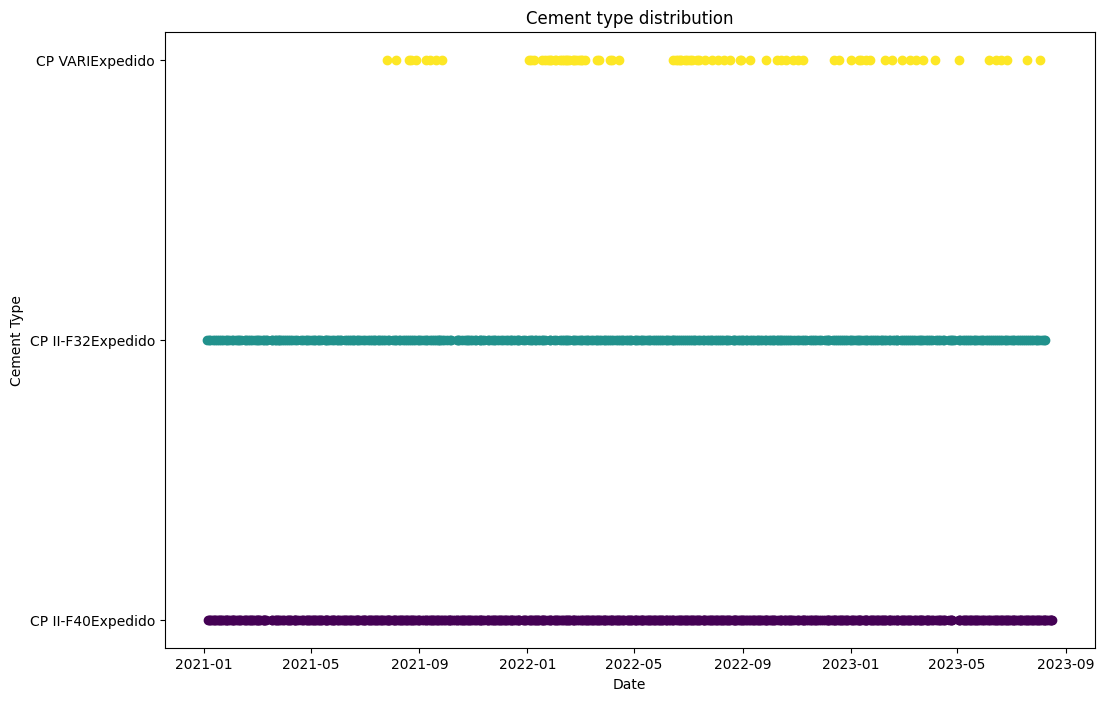

<IPython.core.display.Javascript object>

In [37]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [38]:
for cement_type in df["Cement_Type"].unique():
    print(cement_type)

CP II-F40Expedido
CP II-F32Expedido
CP VARIExpedido


<IPython.core.display.Javascript object>

In [39]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC")].groupby(
    "Cement_Type"
)["CS28"].describe()

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<IPython.core.display.Javascript object>

In [40]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC") |
(df["Cement_Type"] == "CP I40Expedido")
  ].groupby("Cement_Type")["CS28"].describe()


Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<IPython.core.display.Javascript object>

In [41]:
df["Cement_Type"] = (
    df["Cement_Type"]
    .str.replace("Expedido", "")
    .str.replace("Linha 9", "")
    .str.replace("Itajaí", "")
    .str.replace("D-G", "")
    .str.replace("D-E", "")
    .str.replace("DF2", "")
    .str.replace("CPIIF40", "CP II-F-40")
    .str.replace("CP VARI", "CP V-ARI")
    .str.replace("CPVARI", "CP V-ARI")
    .str.replace("CP V-RSARI", "CP V-ARI RS")
    .str.replace("CP III-RS40", "CP III-40 RS")
    .str.replace("CP III-RS32", "CP III-32 RS")
    .str.replace("CP IV-RS32", "CP IV-32 RS")
    .str.replace("CP III40", "CP III-40")
    .str.replace("CP III32", "CP III-32")
    .str.replace("CP I-S40", "CP I-S-40")
    .str.replace("CP I40", "CP I-40")
    .str.replace("CP II-E32", "CP II-E-32")
    .str.replace("CP II-E40", "CP II-E-40")
    .str.replace("CP II-F FIBRO40", "CP II-F-40")
    .str.replace("CP II-F32", "CP II-F-32")
    .str.replace("CP II-F40", "CP II-F-40")
    .str.replace("CP II-Z32", "CP II-Z-32")
    .str.replace("CP II-Z40", "CP II-Z-40")
    .str.replace("CP IV32", "CP IV-32")
    .str.replace("CP IND", "CP I")
    .str.replace("CPINDCC", "CP I")
    .str.strip()
)

<IPython.core.display.Javascript object>

In [42]:
df["Cement_Type"].value_counts().sort_index()

Cement_Type
CP II-F-32    398
CP II-F-40    640
CP V-ARI       84
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_1316412/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


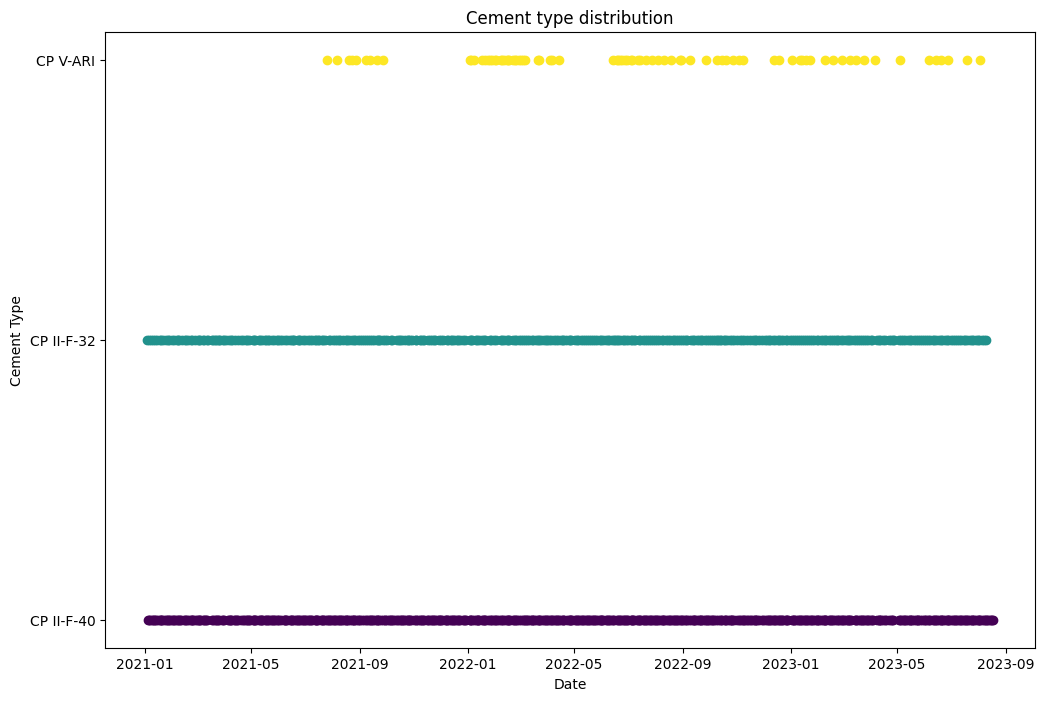

<IPython.core.display.Javascript object>

In [43]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [44]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

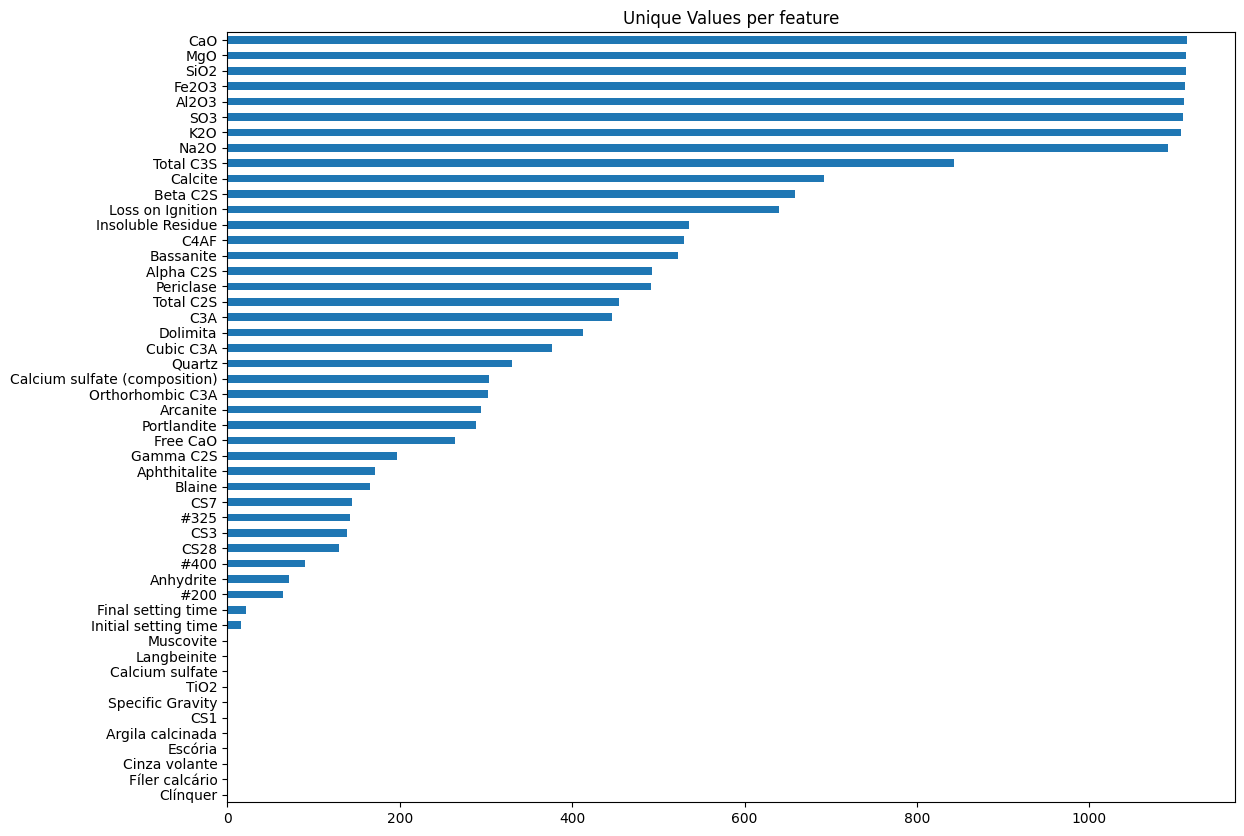

<IPython.core.display.Javascript object>

In [45]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

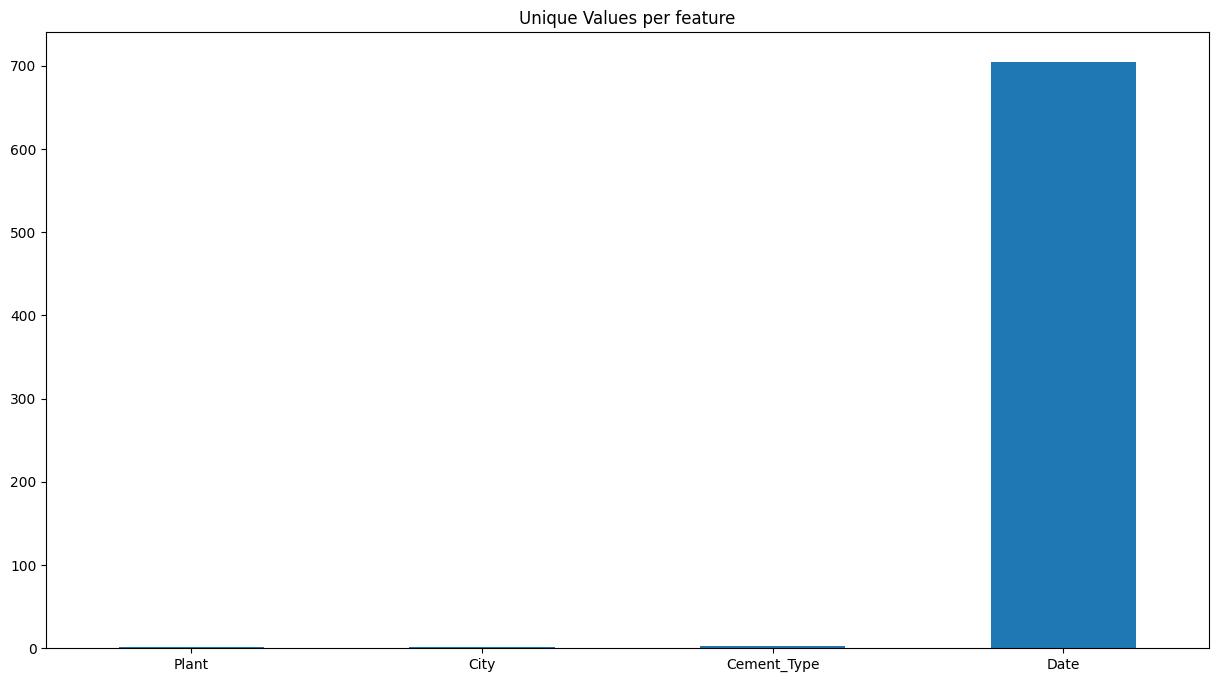

<IPython.core.display.Javascript object>

In [46]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

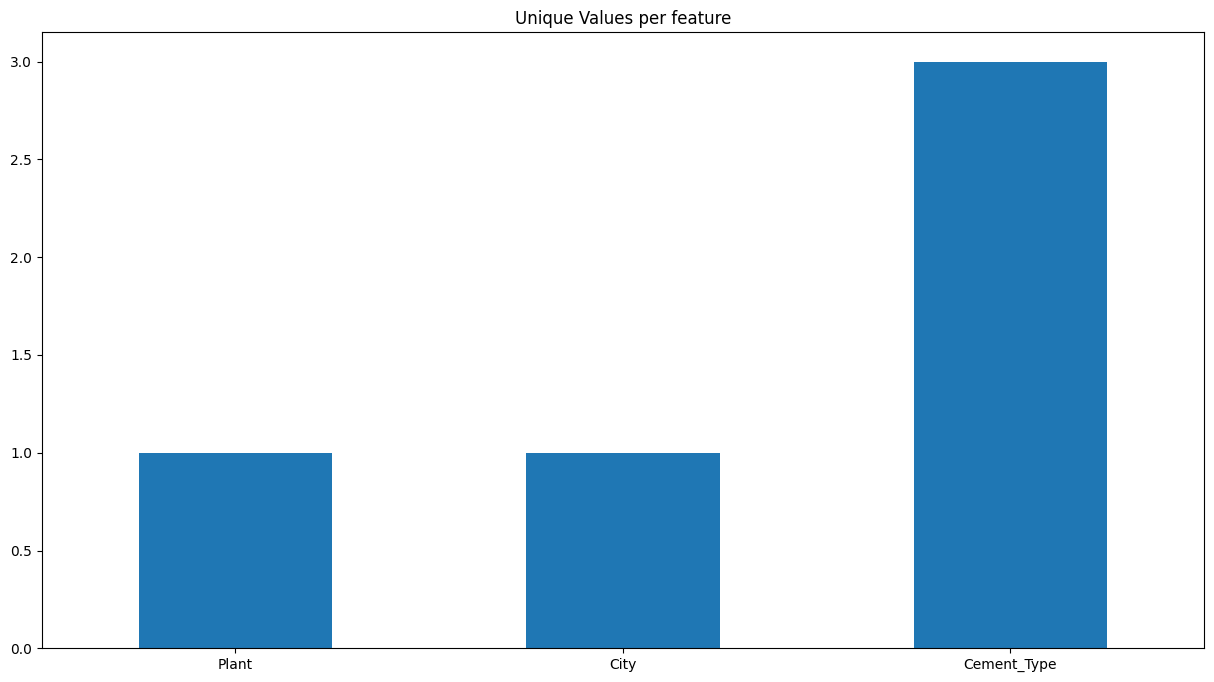

<IPython.core.display.Javascript object>

In [47]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [48]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 49 variables with missing values from a total of 54


<IPython.core.display.Javascript object>

In [49]:
df.isna().any()

Plant                            False
City                             False
Date                             False
Clínquer                          True
Fíler calcário                    True
Cinza volante                     True
Escória                           True
Argila calcinada                  True
Calcium sulfate (composition)     True
Total C3S                         True
Total C2S                         True
Alpha C2S                         True
Beta C2S                          True
Gamma C2S                         True
C4AF                              True
C3A                               True
Cubic C3A                         True
Orthorhombic C3A                  True
Free CaO                          True
Portlandite                       True
Periclase                         True
Arcanite                          True
Aphthitalite                      True
Langbeinite                       True
Calcium sulfate                   True
Bassanite                

<IPython.core.display.Javascript object>

In [50]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [51]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 54 artists>

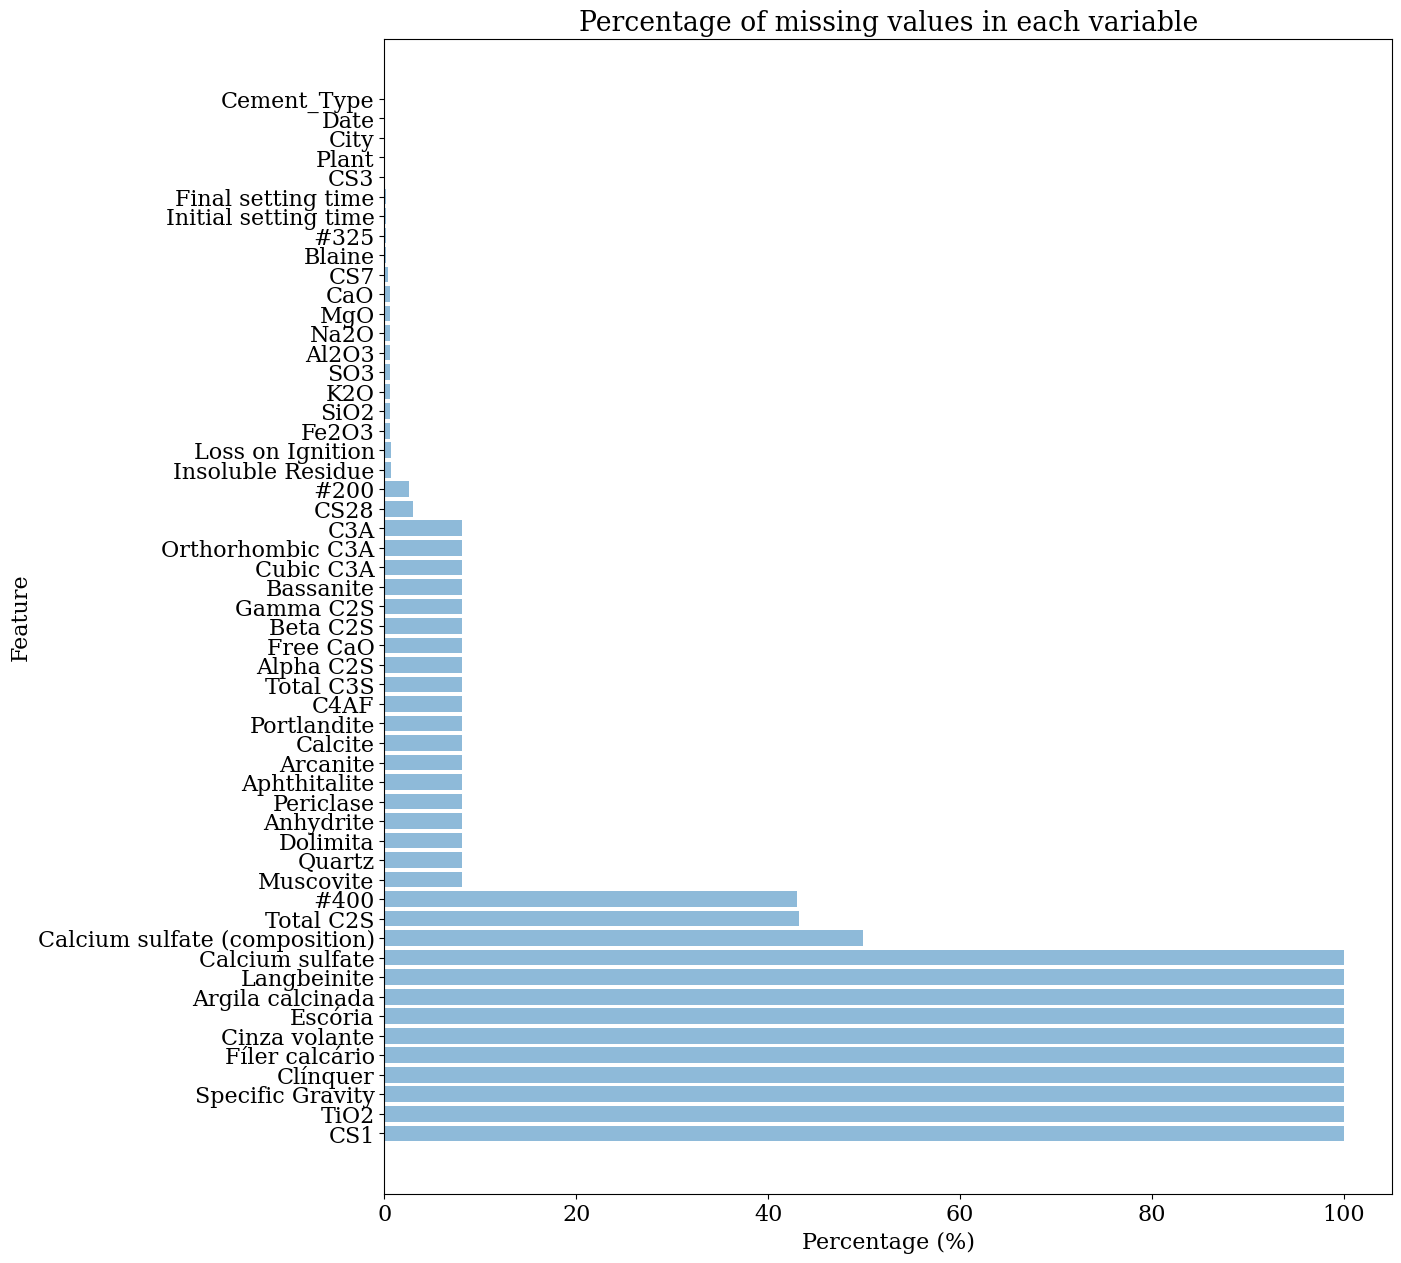

<IPython.core.display.Javascript object>

In [52]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [53]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

## Percentage of zeros each variable

In [54]:
df.drop(["Date"], axis=1).select_dtypes(include="number").columns

Index(['Clínquer', 'Fíler calcário', 'Cinza volante', 'Escória',
       'Argila calcinada', 'Calcium sulfate (composition)', 'Total C3S',
       'Total C2S', 'Alpha C2S', 'Beta C2S', 'Gamma C2S', 'C4AF', 'C3A',
       'Cubic C3A', 'Orthorhombic C3A', 'Free CaO', 'Portlandite', 'Periclase',
       'Arcanite', 'Aphthitalite', 'Langbeinite', 'Calcium sulfate',
       'Bassanite', 'Anhydrite', 'Calcite', 'Dolimita', 'Quartz', 'Muscovite',
       'CaO', 'MgO', 'Na2O', 'Al2O3', 'SiO2', 'SO3', 'K2O', 'TiO2', 'Fe2O3',
       'Loss on Ignition', 'Insoluble Residue', 'Blaine', '#200', '#325',
       '#400', 'Specific Gravity', 'Initial setting time',
       'Final setting time', 'CS1', 'CS3', 'CS7', 'CS28'],
      dtype='object')

<IPython.core.display.Javascript object>

In [55]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for {plant}")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for {plant}")
zero_percentages.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [56]:
zero_percentages

Zero (%) for W
Muscovite                           91.889483
Gamma C2S                           53.654189
Anhydrite                           28.163993
#200                                18.805704
Arcanite                             4.456328
Alpha C2S                            1.426025
Bassanite                            0.713012
Dolimita                             0.356506
Aphthitalite                         0.267380
Free CaO                             0.267380
Quartz                               0.089127
Fe2O3                                0.000000
SiO2                                 0.000000
SO3                                  0.000000
K2O                                  0.000000
TiO2                                 0.000000
Insoluble Residue                    0.000000
Loss on Ignition                     0.000000
Na2O                                 0.000000
Blaine                               0.000000
#325                                 0.000000
#400                                 0.000000
Specific Gravity                     0.000000
Initial setting time                 0.000000
Final setting time                   0.000000
CS1                                  0.000000
CS3                                  0.000000
CS7                                  0.000000
Al2O3                                0.000000
Clínquer                             0.000000
MgO                                  0.000000
CaO                                  0.000000
Cinza volante                        0.000000
Escória                              0.000000
Argila calcinada                     0.000000
Calcium sulfate (composition)        0.000000
Total C3S                            0.000000
Total C2S                            0.000000
Beta C2S                             0.000000
C4AF                                 0.000000
C3A                                  0.000000
Cubic C3A                            0.000000
Orthorhombic C3A                     0.000000
Portlandite                          0.000000
Periclase                            0.000000
Langbeinite                          0.000000
Calcium sulfate                      0.000000
Calcite                              0.000000
Fíler calcário                       0.000000
CS28                                 0.000000

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [57]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

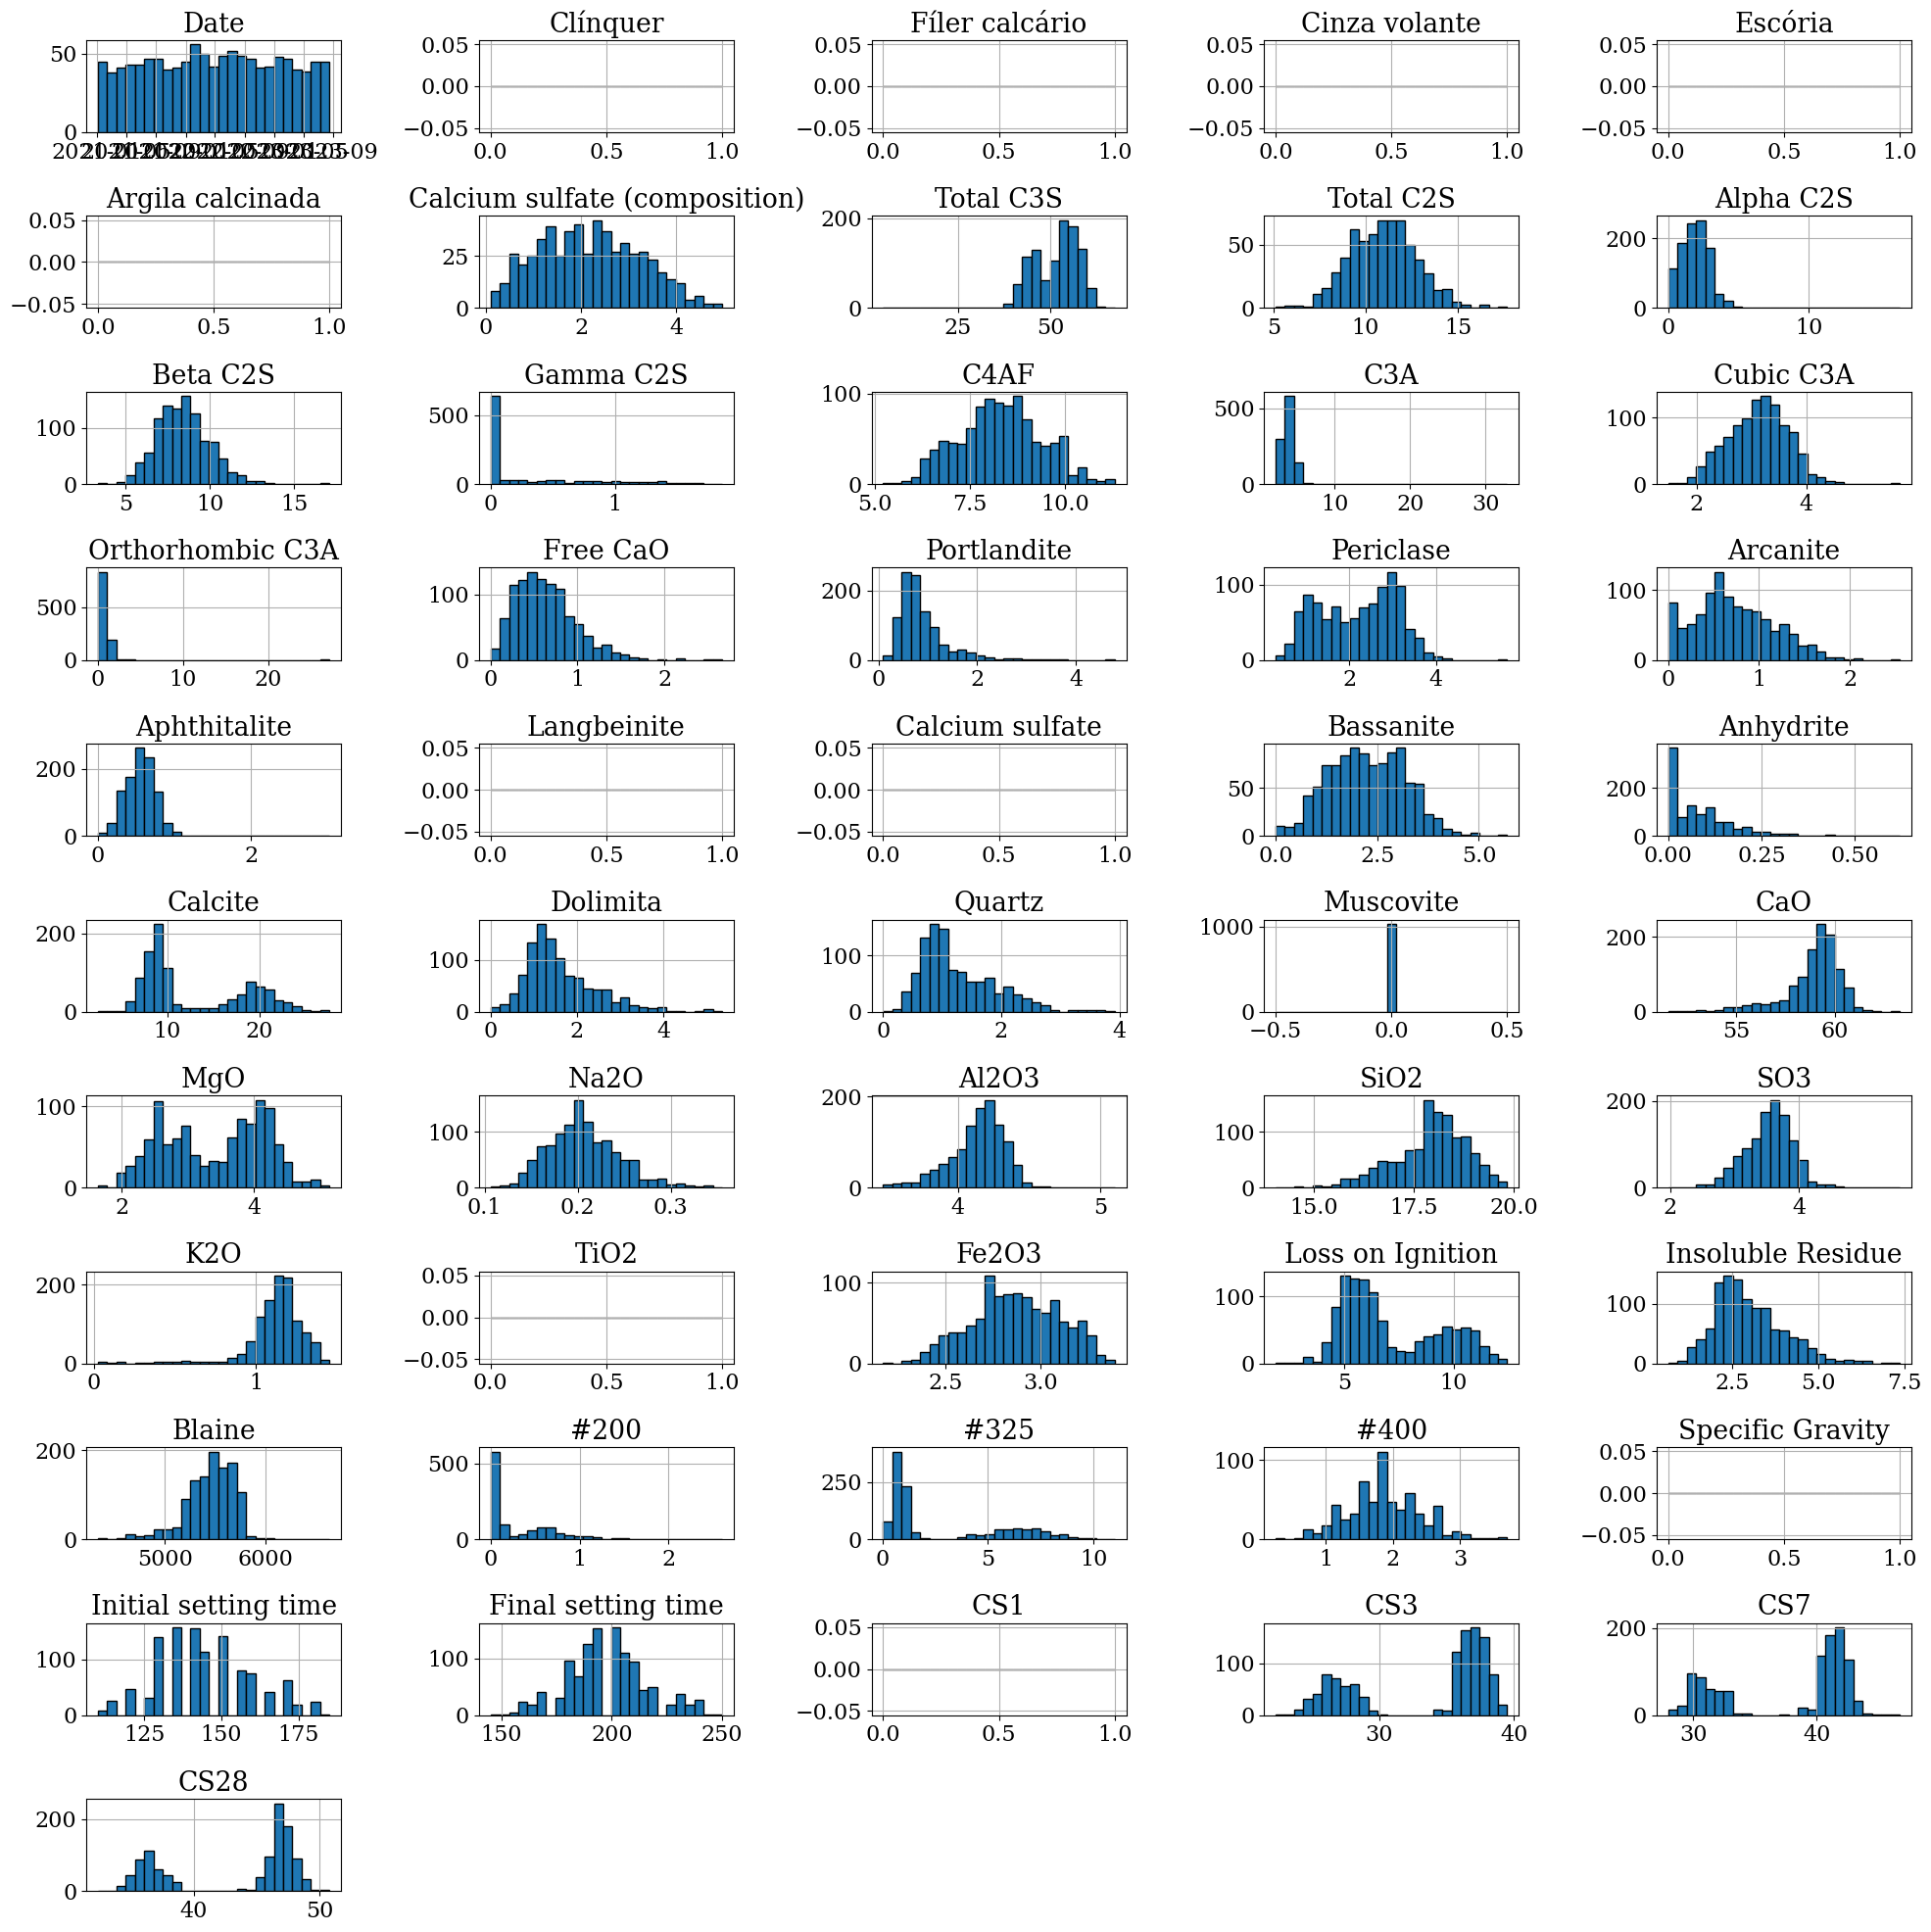

<IPython.core.display.Javascript object>

In [58]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

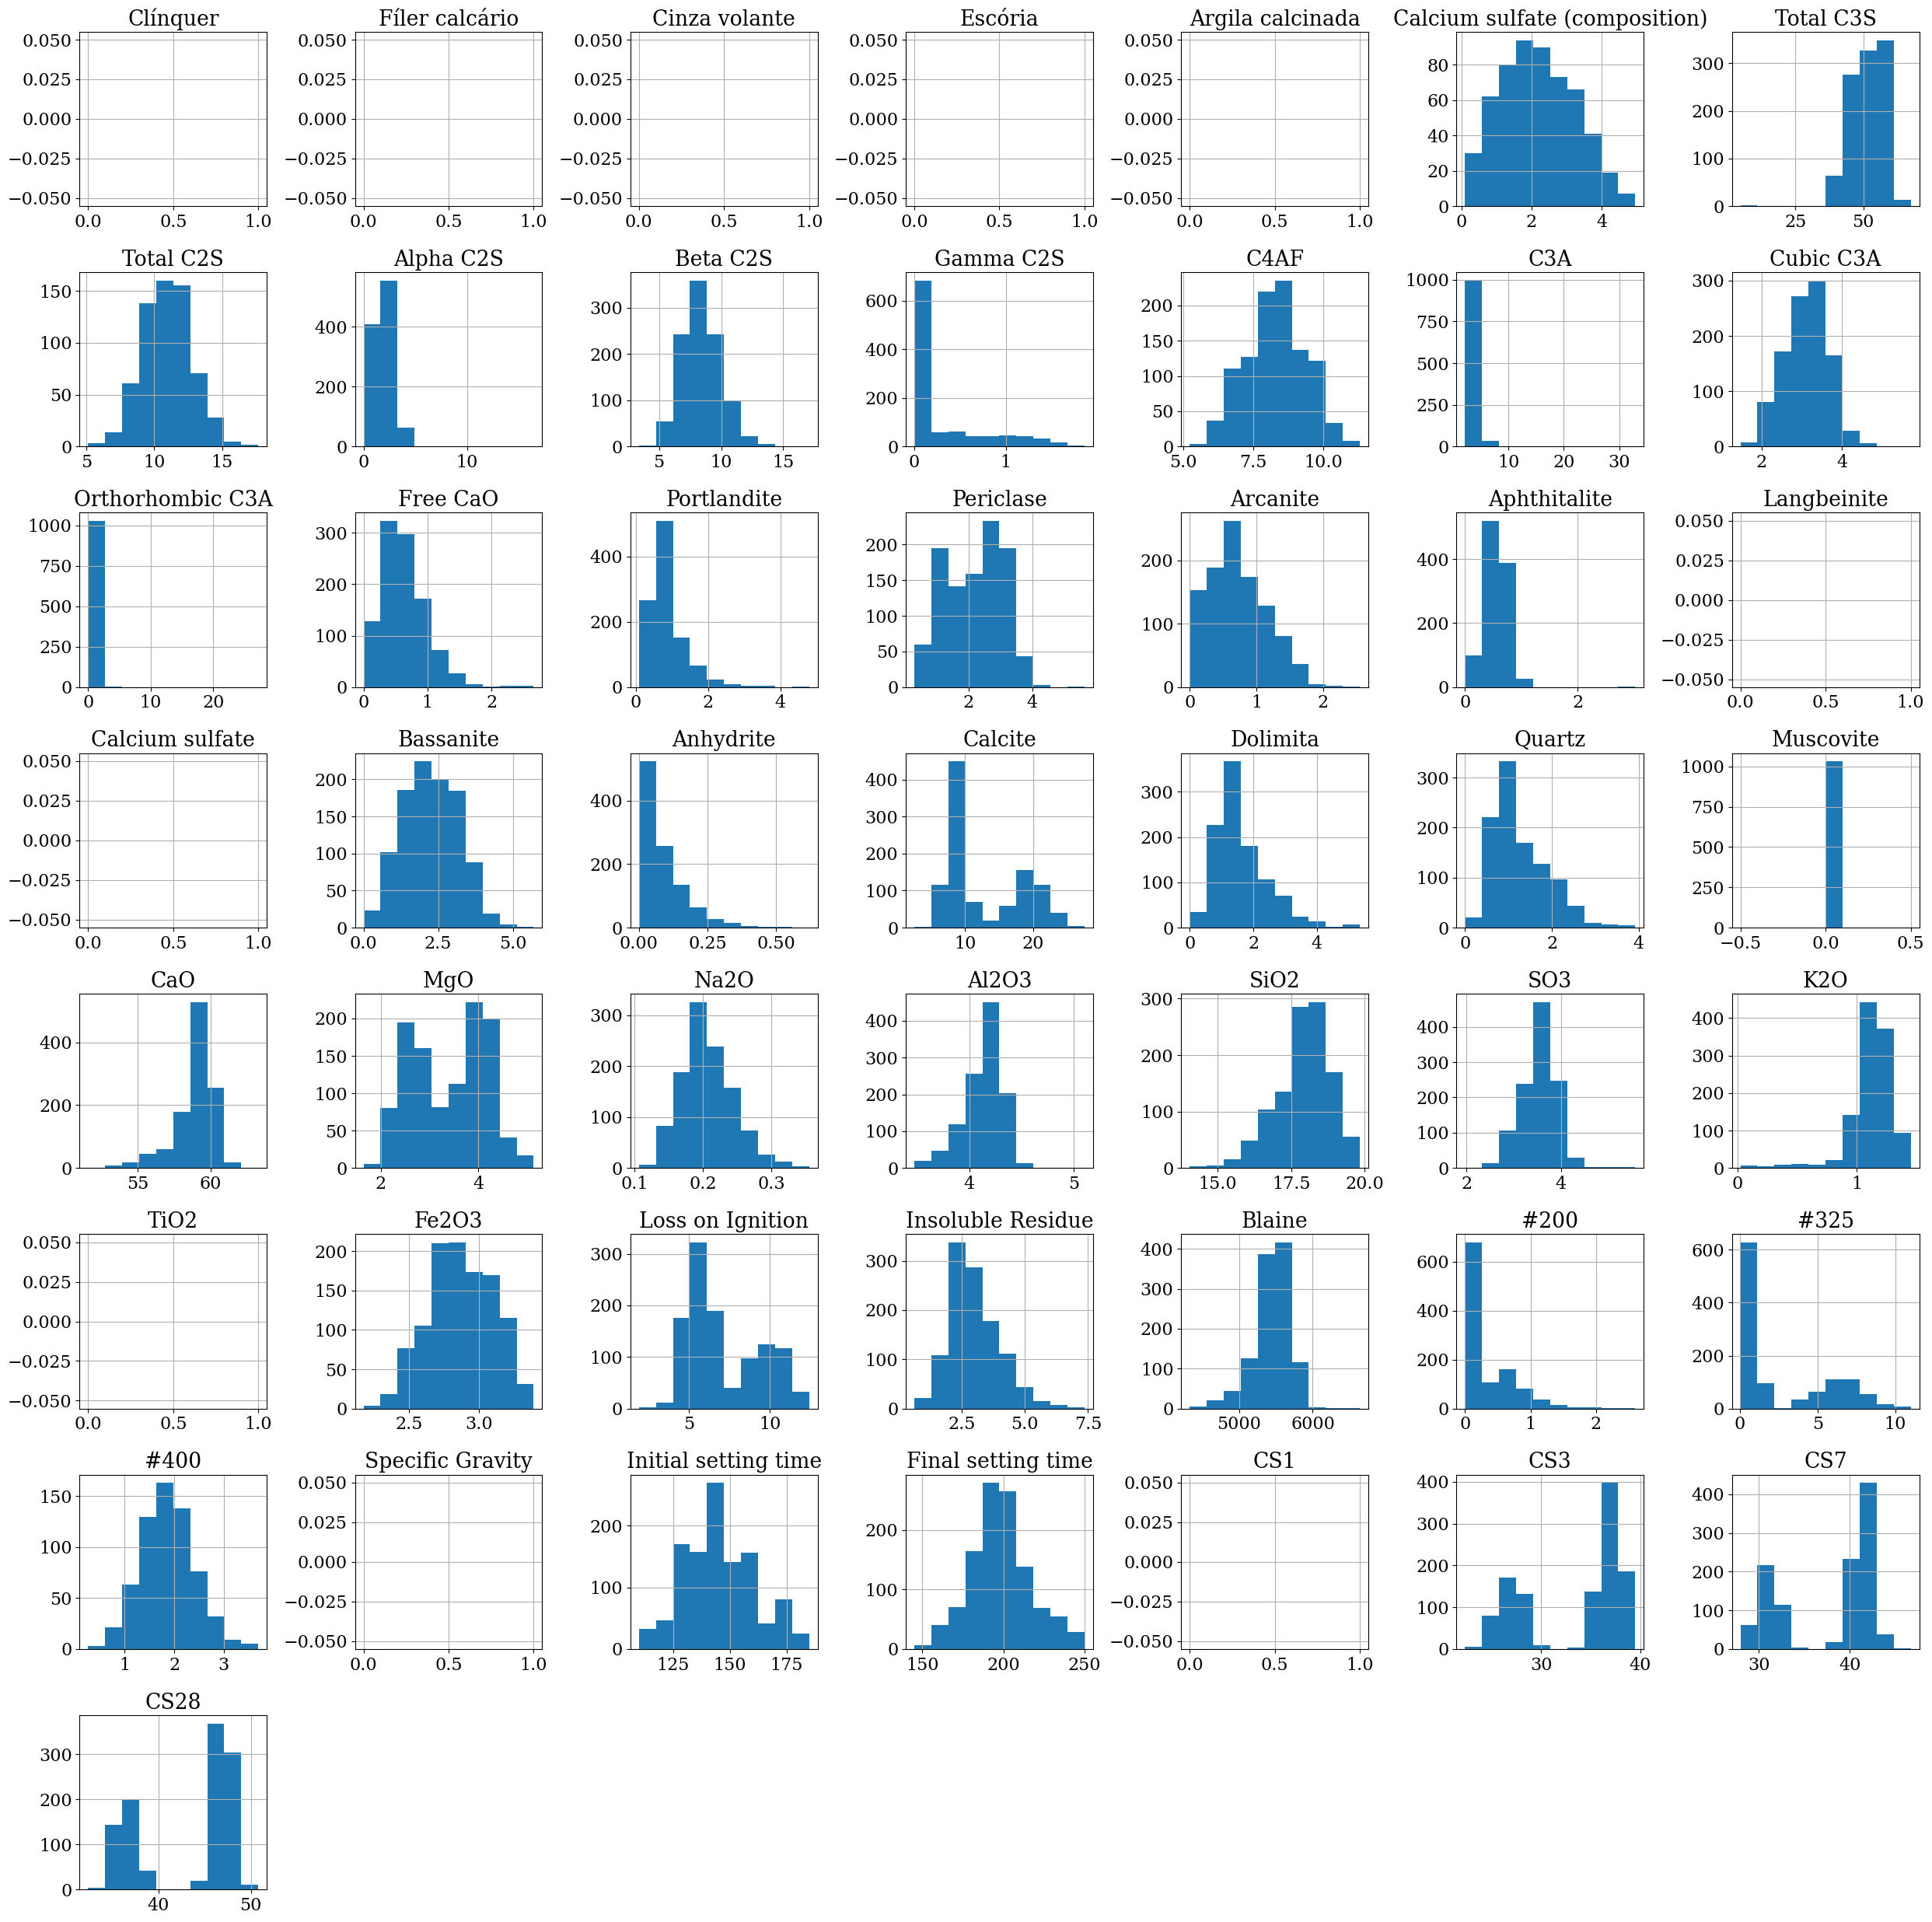

<IPython.core.display.Javascript object>

In [59]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

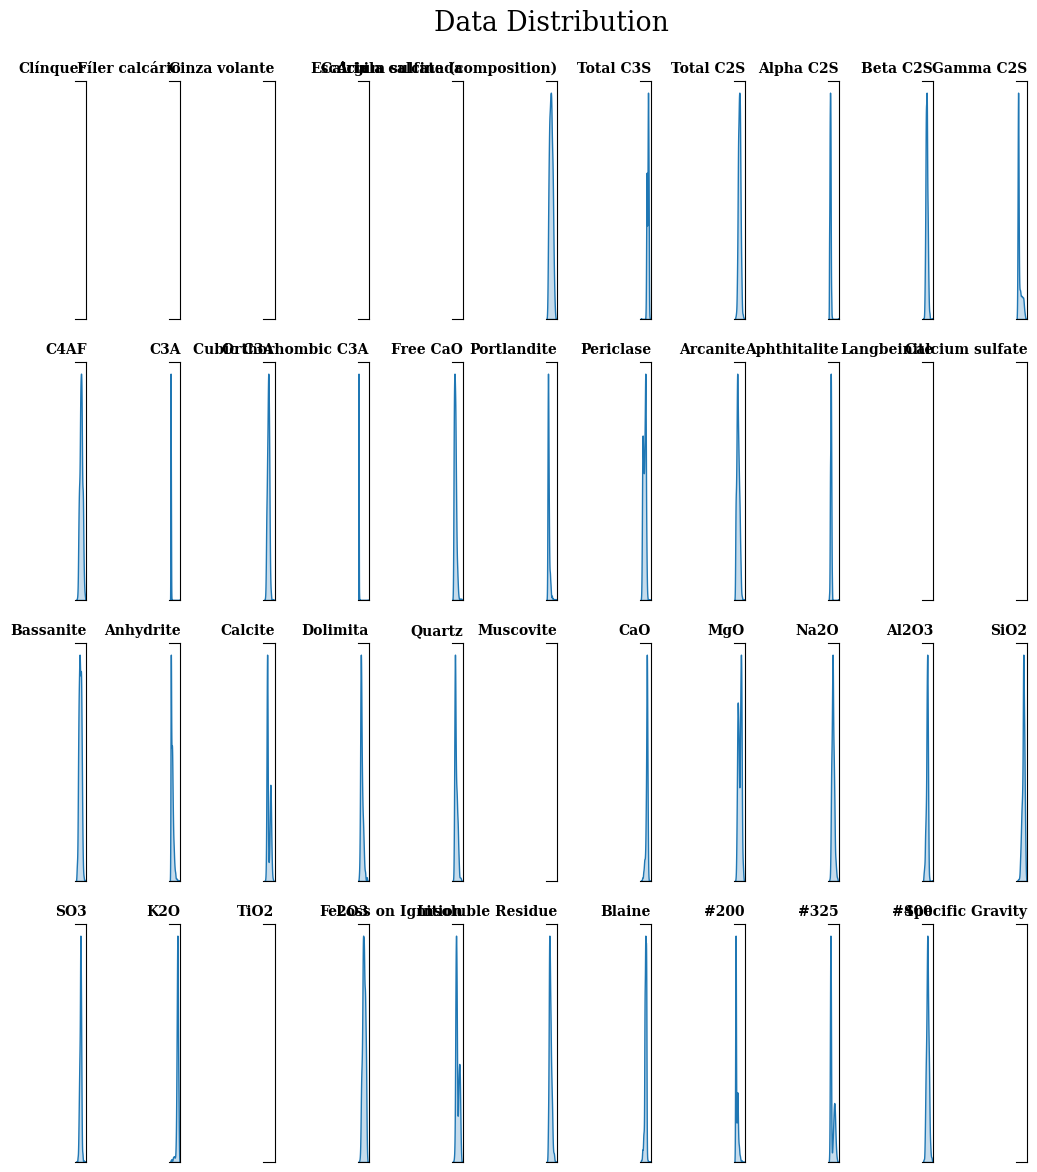

<IPython.core.display.Javascript object>

In [60]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(4, 11, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").select_dtypes(exclude=object).columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

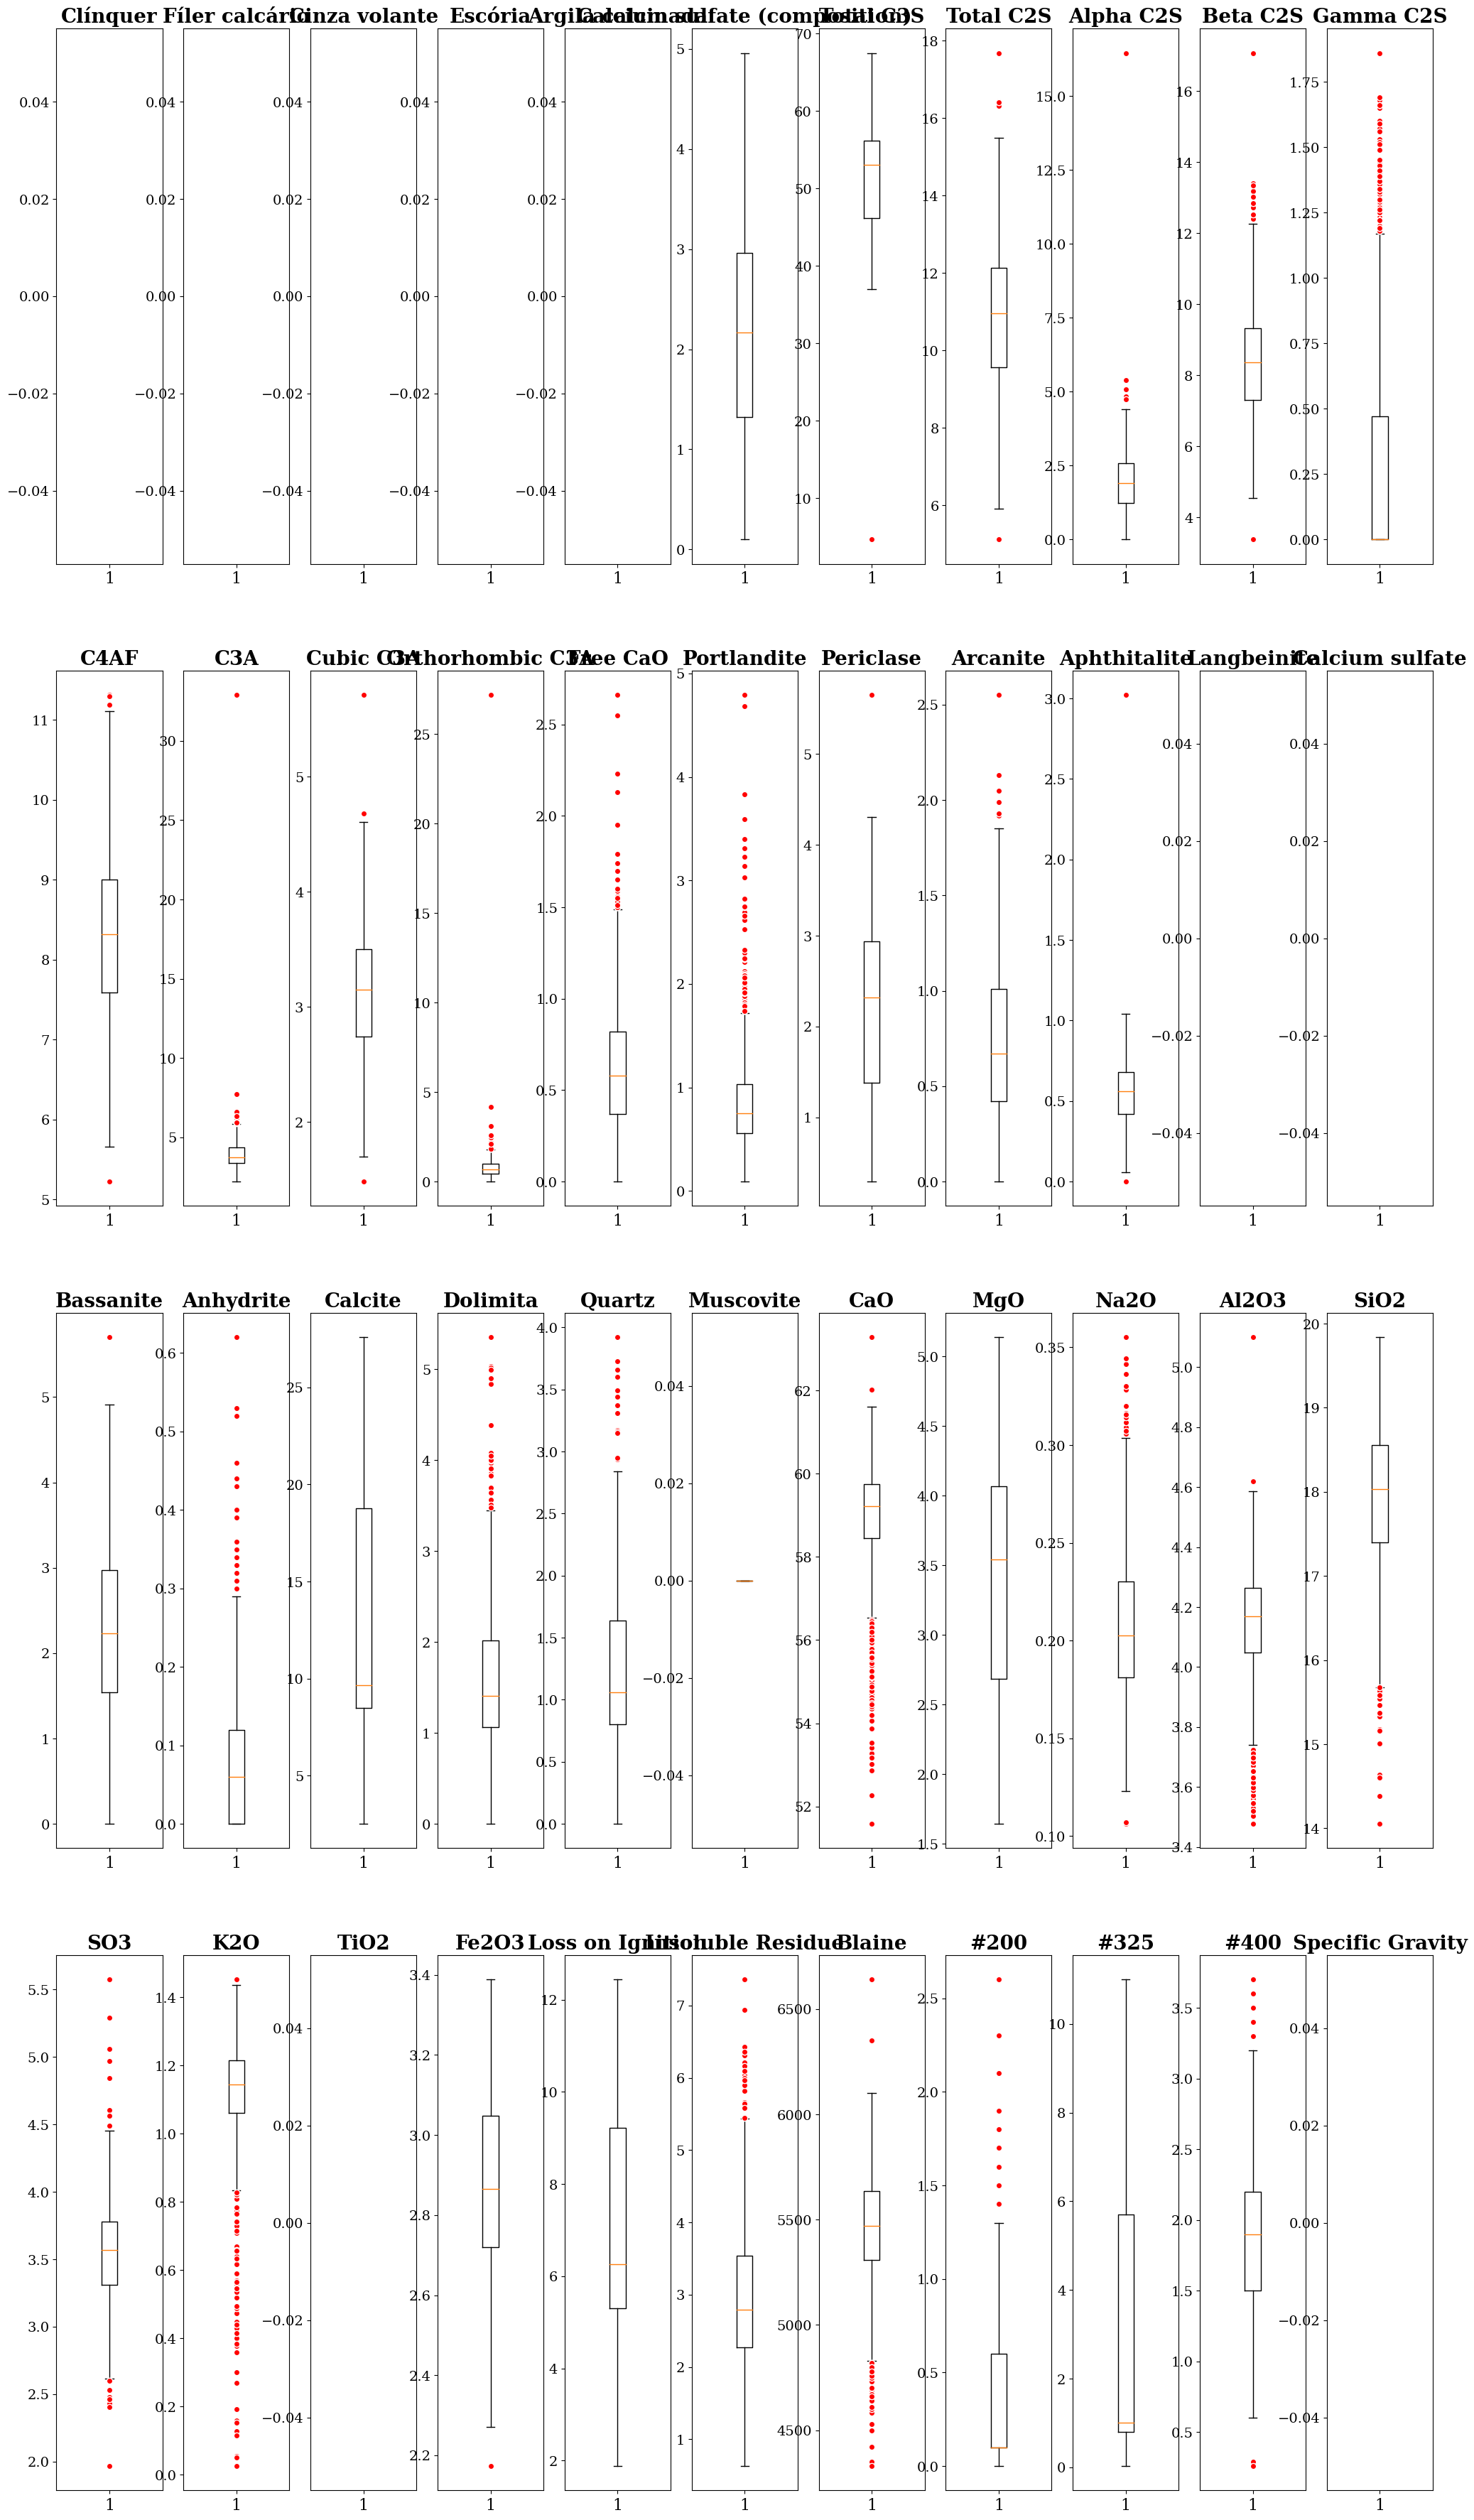

<IPython.core.display.Javascript object>

In [61]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(4, 11, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

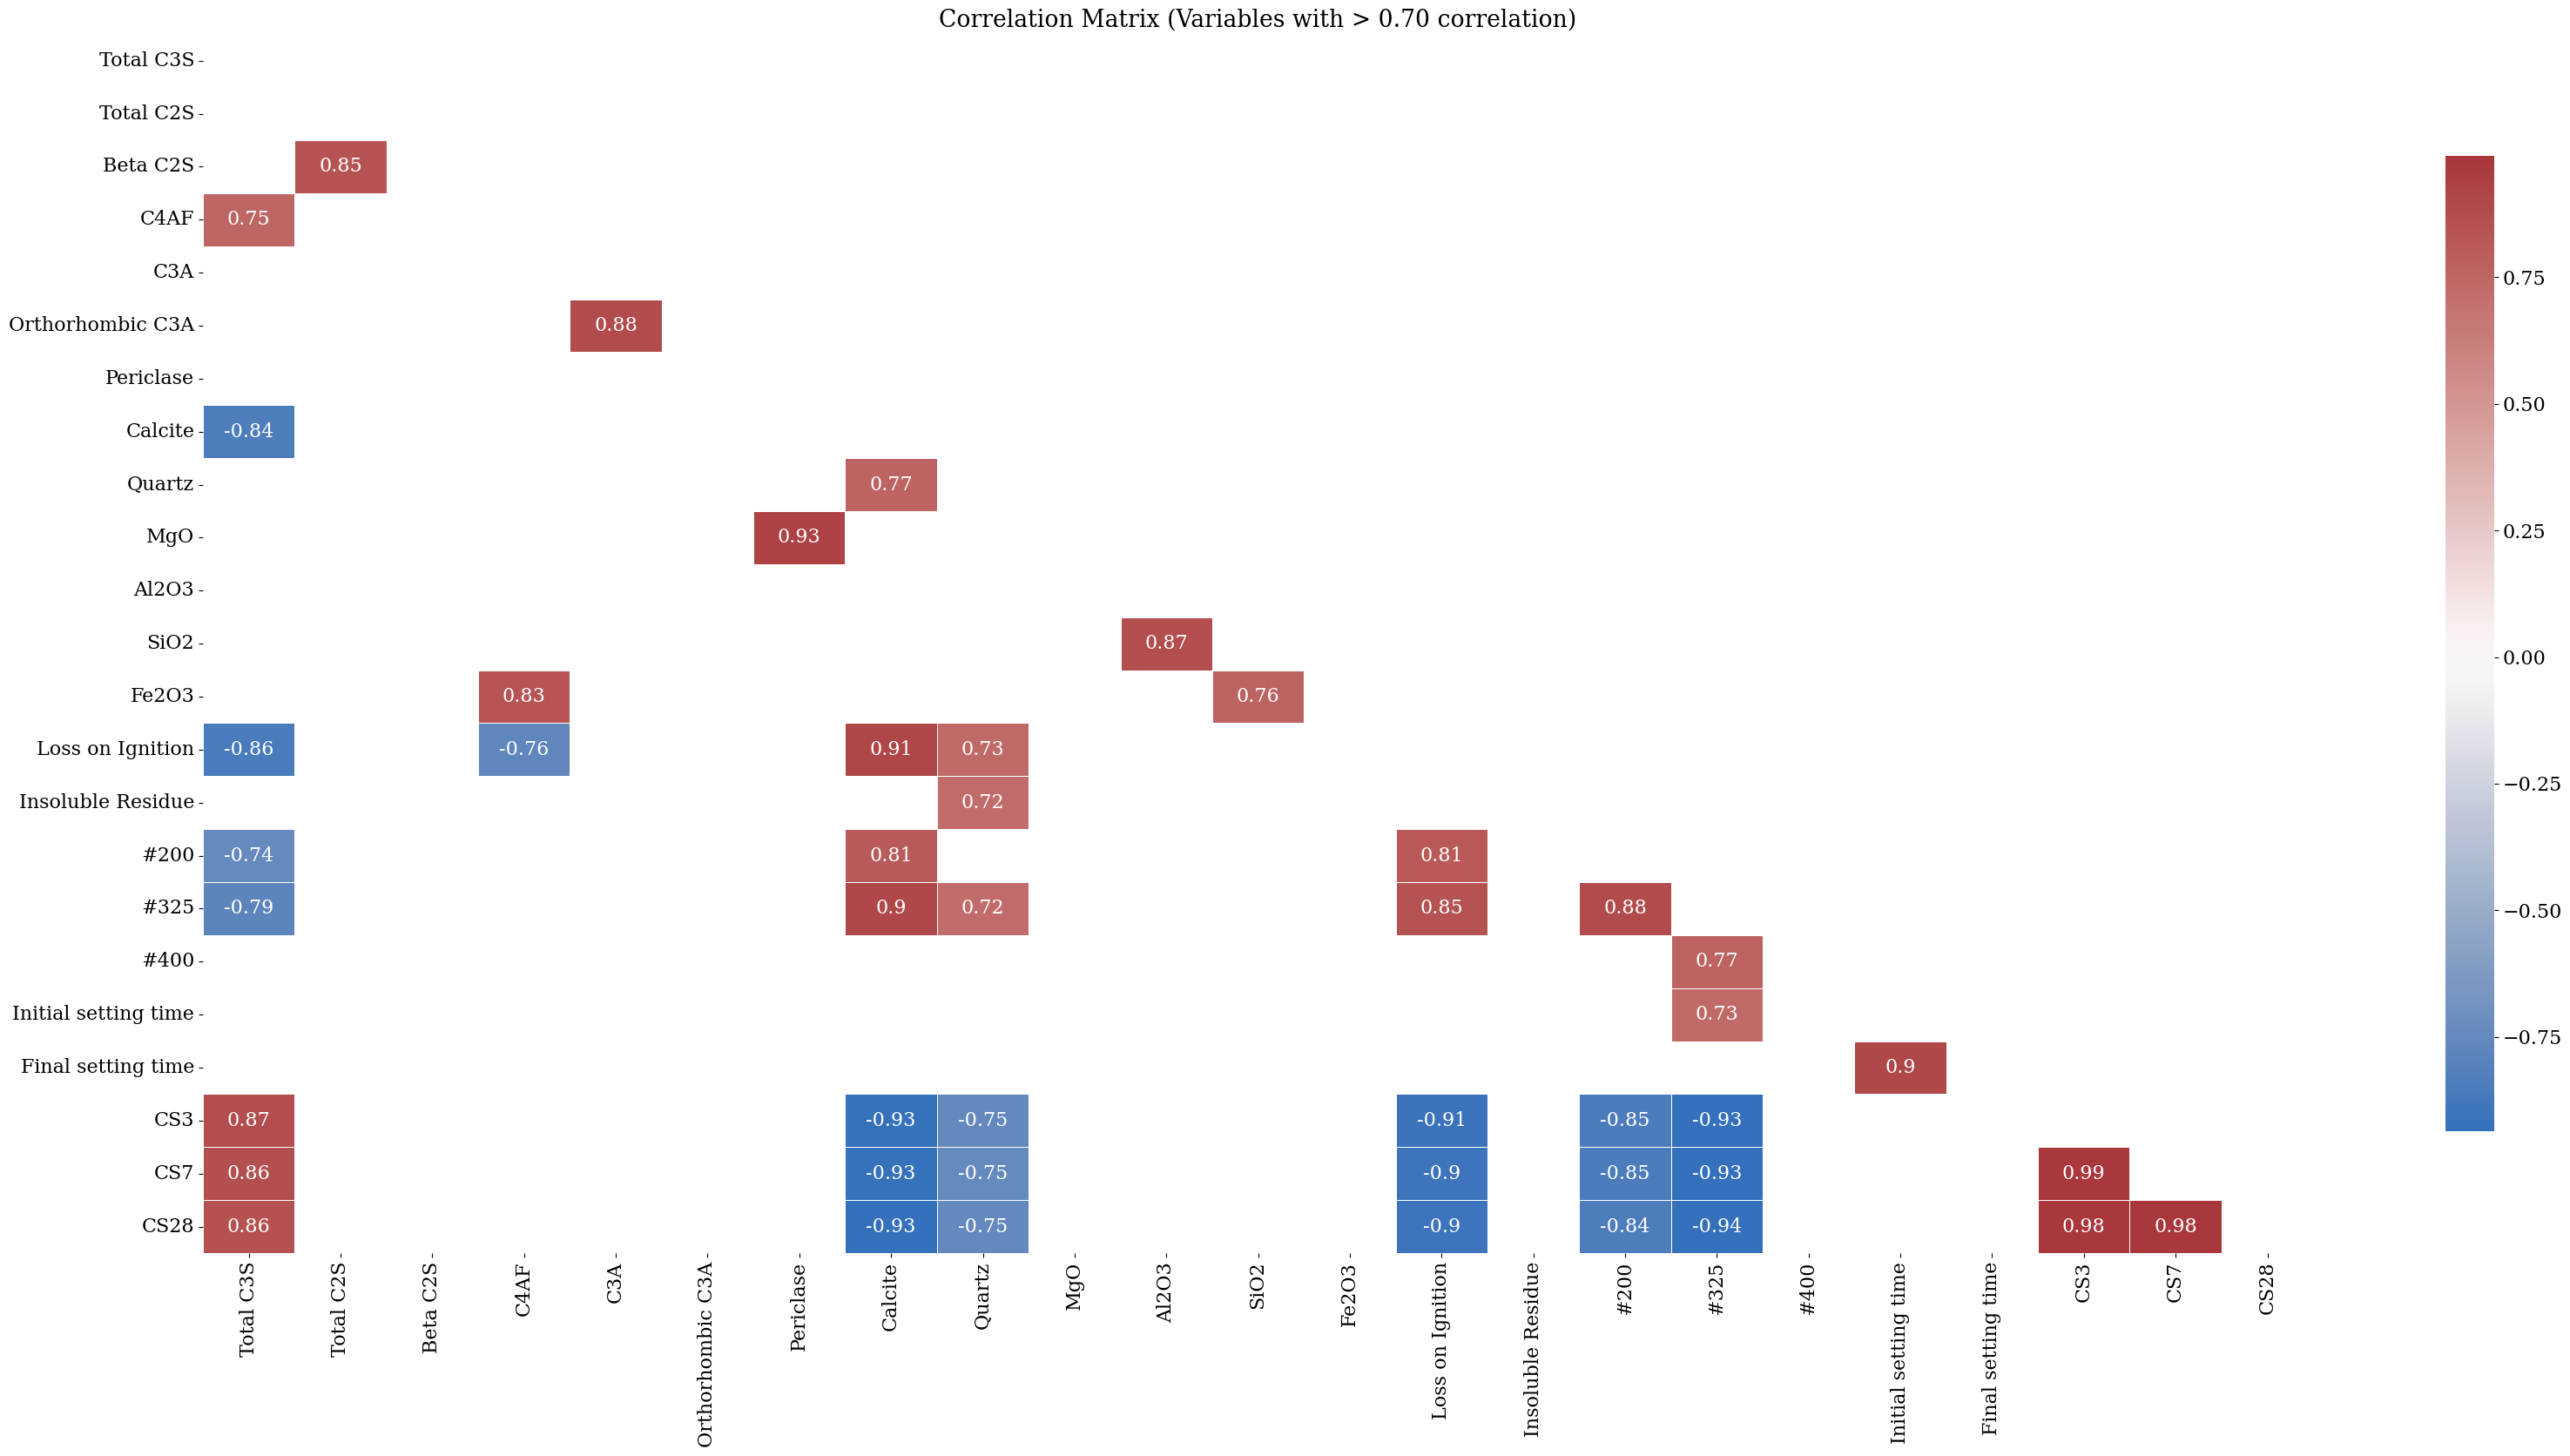

<IPython.core.display.Javascript object>

In [62]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [63]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3                   CS7                     0.989385
CS7                   CS28                    0.982555
CS3                   CS28                    0.981768
#325                  CS28                    0.936624
                      CS7                     0.934567
Calcite               CS28                    0.931718
#325                  CS3                     0.930360
Periclase             MgO                     0.927242
Calcite               CS7                     0.927119
                      CS3                     0.926616
Loss on Ignition      CS3                     0.909255
Calcite               Loss on Ignition        0.907213
Loss on Ignition      CS28                    0.903575
Initial setting time  Final setting time      0.902417
Loss on Ignition      CS7                     0.900225
Calcite               #325                    0.899164
#200                  #325                    0.881664
C3A                   Orthorhombic C3A        0.881364
Al2O3     

<IPython.core.display.Javascript object>

In [64]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.982555
CS3                            CS28    0.981768
#325                           CS28    0.936624
Calcite                        CS28    0.931718
Loss on Ignition               CS28    0.903575
Total C3S                      CS28    0.861205
#200                           CS28    0.840945
Quartz                         CS28    0.753170
Initial setting time           CS28    0.677188
Dolimita                       CS28    0.671800
C4AF                           CS28    0.662526
Insoluble Residue              CS28    0.572301
Final setting time             CS28    0.560893
SiO2                           CS28    0.547576
Al2O3                          CS28    0.513732
Fe2O3                          CS28    0.490224
SO3                            CS28    0.473441
Alpha C2S                      CS28    0.424547
Blaine                         CS28    0.404568
Anhydrite                      CS28    0.373229
Arcanite                       CS28    0

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

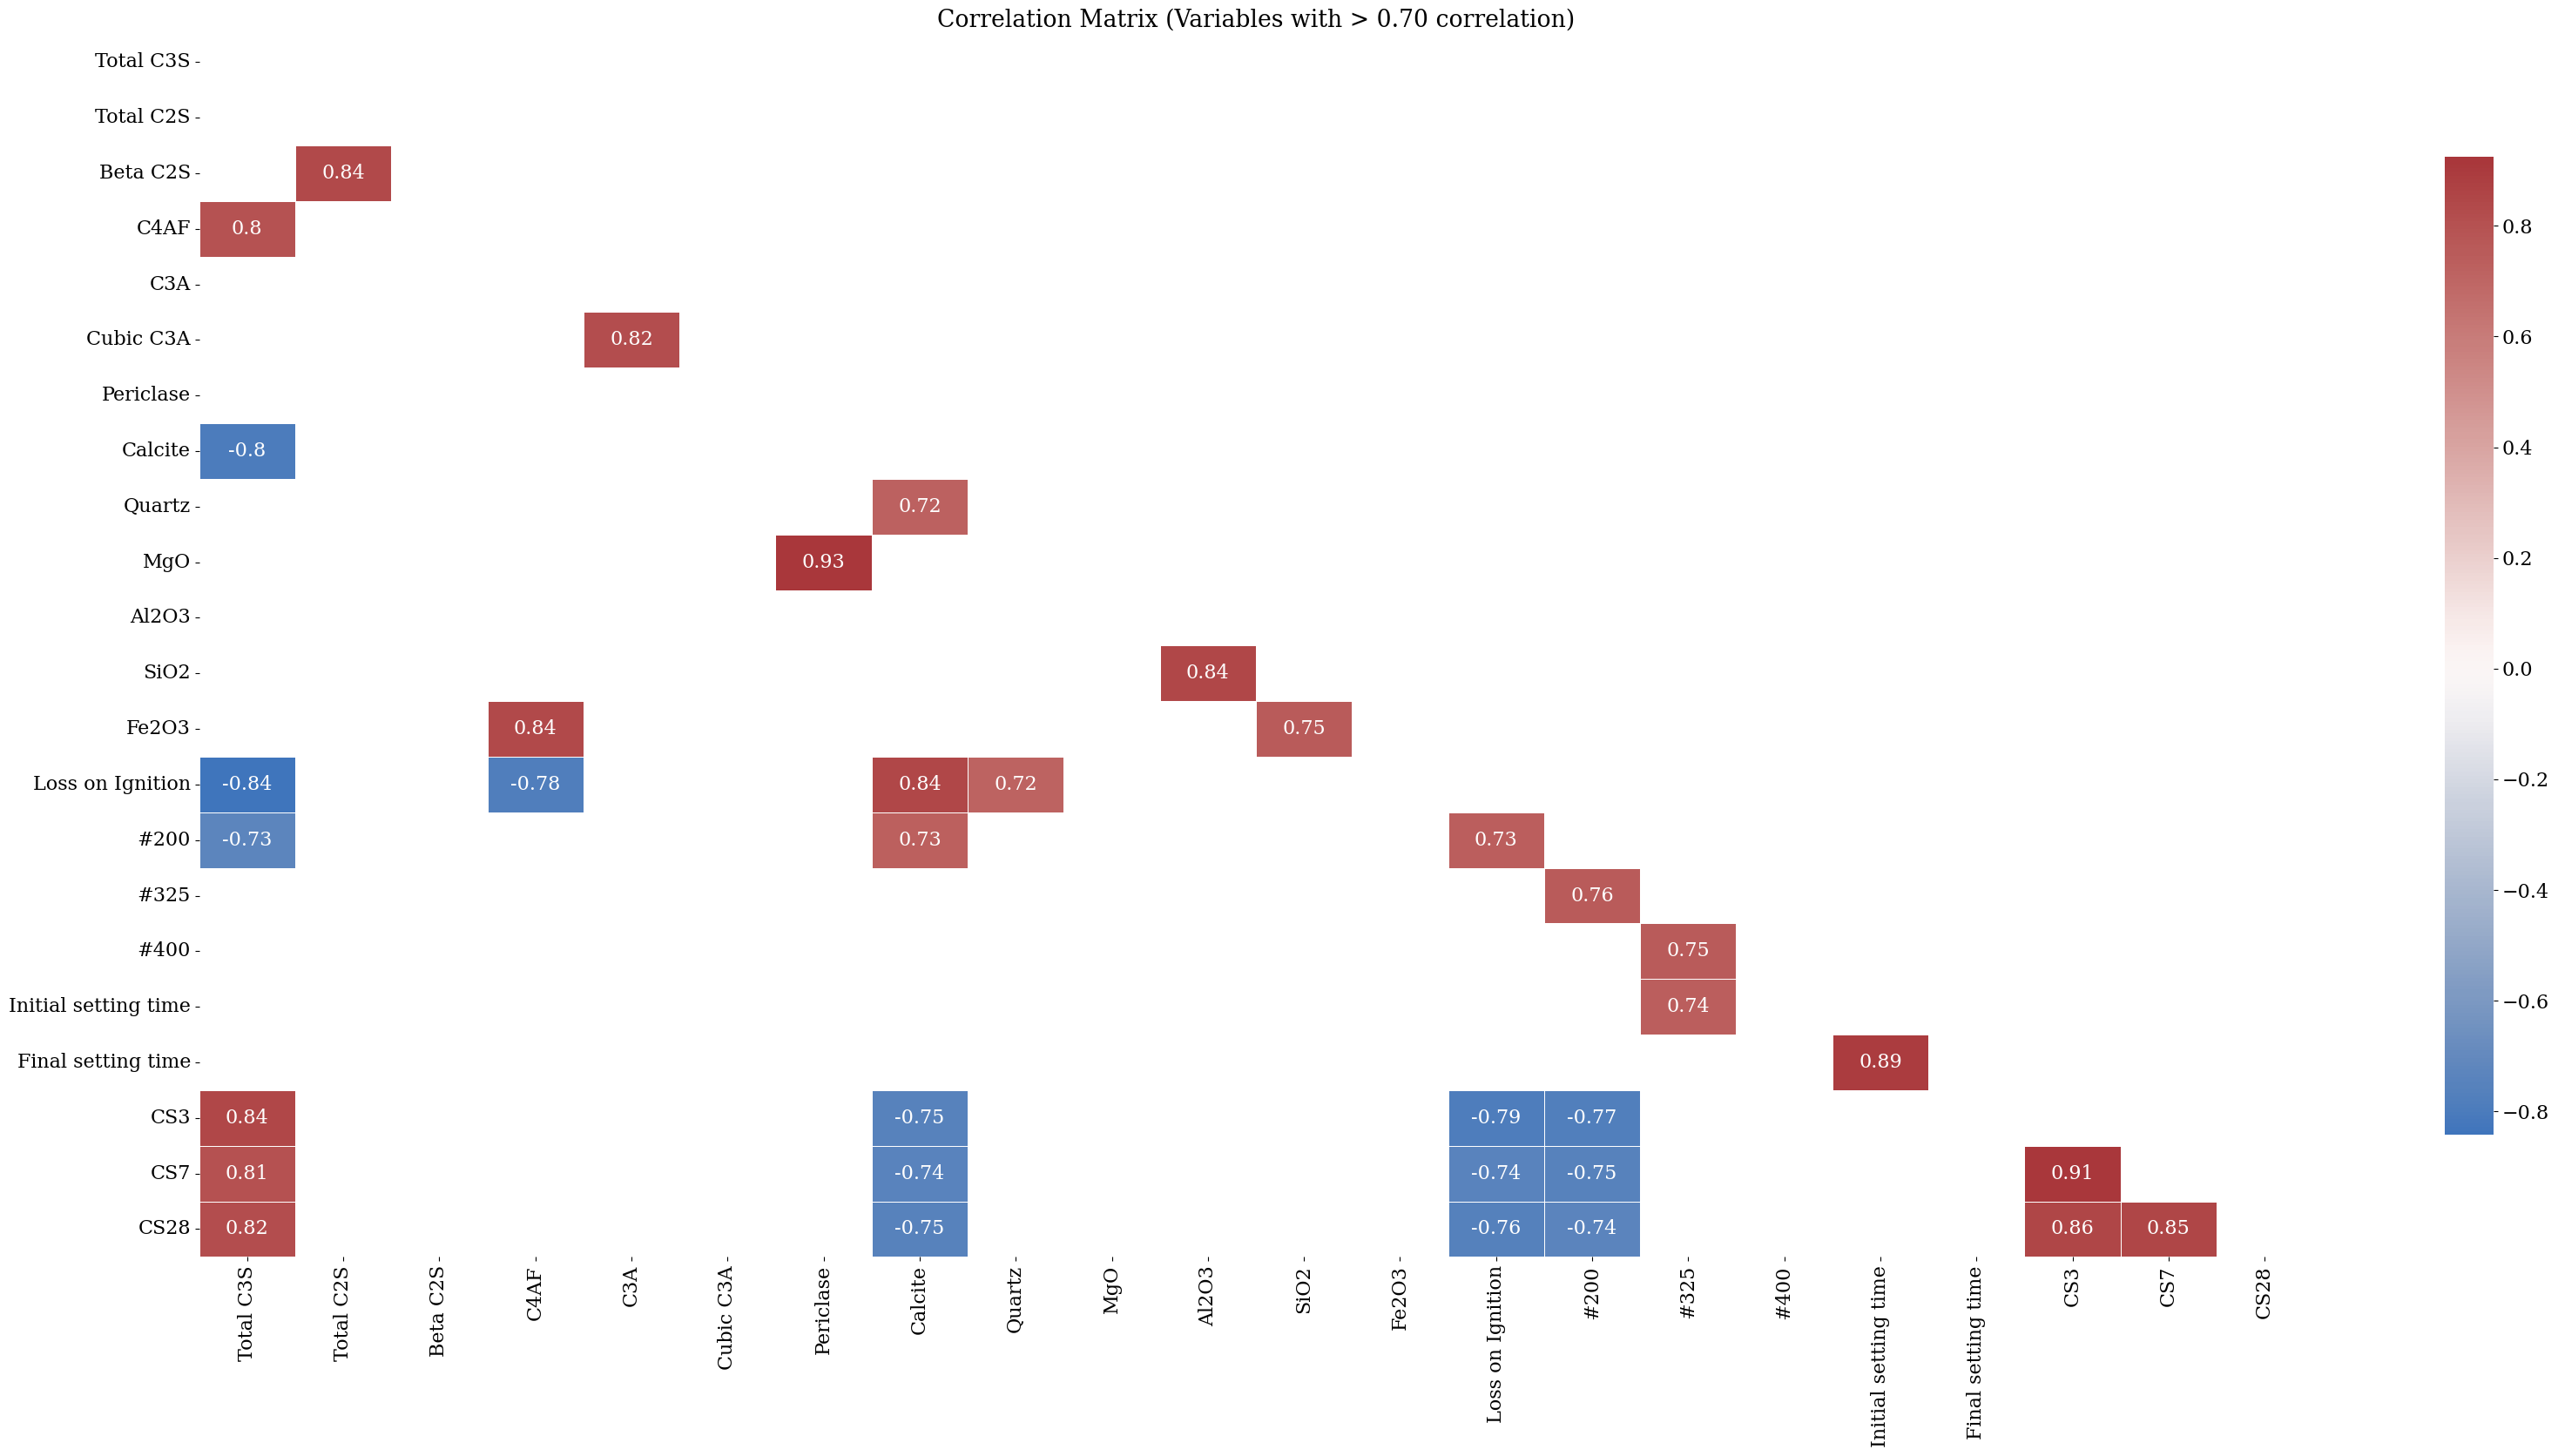

<IPython.core.display.Javascript object>

In [65]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [66]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Periclase             MgO                     0.925109
CS3                   CS7                     0.911479
Initial setting time  Final setting time      0.892398
CS3                   CS28                    0.855645
CS7                   CS28                    0.852001
Al2O3                 SiO2                    0.844961
Calcite               Loss on Ignition        0.842943
Total C3S             CS3                     0.842713
                      Loss on Ignition        0.841919
C4AF                  Fe2O3                   0.840775
Total C2S             Beta C2S                0.839338
C3A                   Cubic C3A               0.819335
Total C3S             CS28                    0.818543
                      CS7                     0.806952
                      Calcite                 0.799336
                      C4AF                    0.795037
Loss on Ignition      CS3                     0.791191
C4AF                  Loss on Ignition        0.784486
#200      

<IPython.core.display.Javascript object>

In [67]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS3                            CS28    0.855645
CS7                            CS28    0.852001
Total C3S                      CS28    0.818543
Loss on Ignition               CS28    0.762233
Calcite                        CS28    0.746549
#200                           CS28    0.736670
Quartz                         CS28    0.666559
C4AF                           CS28    0.662815
#325                           CS28    0.638519
Dolimita                       CS28    0.601209
Initial setting time           CS28    0.531083
SiO2                           CS28    0.515592
Fe2O3                          CS28    0.505172
Insoluble Residue              CS28    0.495403
Al2O3                          CS28    0.470562
SO3                            CS28    0.467298
Final setting time             CS28    0.408802
Alpha C2S                      CS28    0.387648
Arcanite                       CS28    0.386044
Blaine                         CS28    0.324650
Total C2S                      CS28    0

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

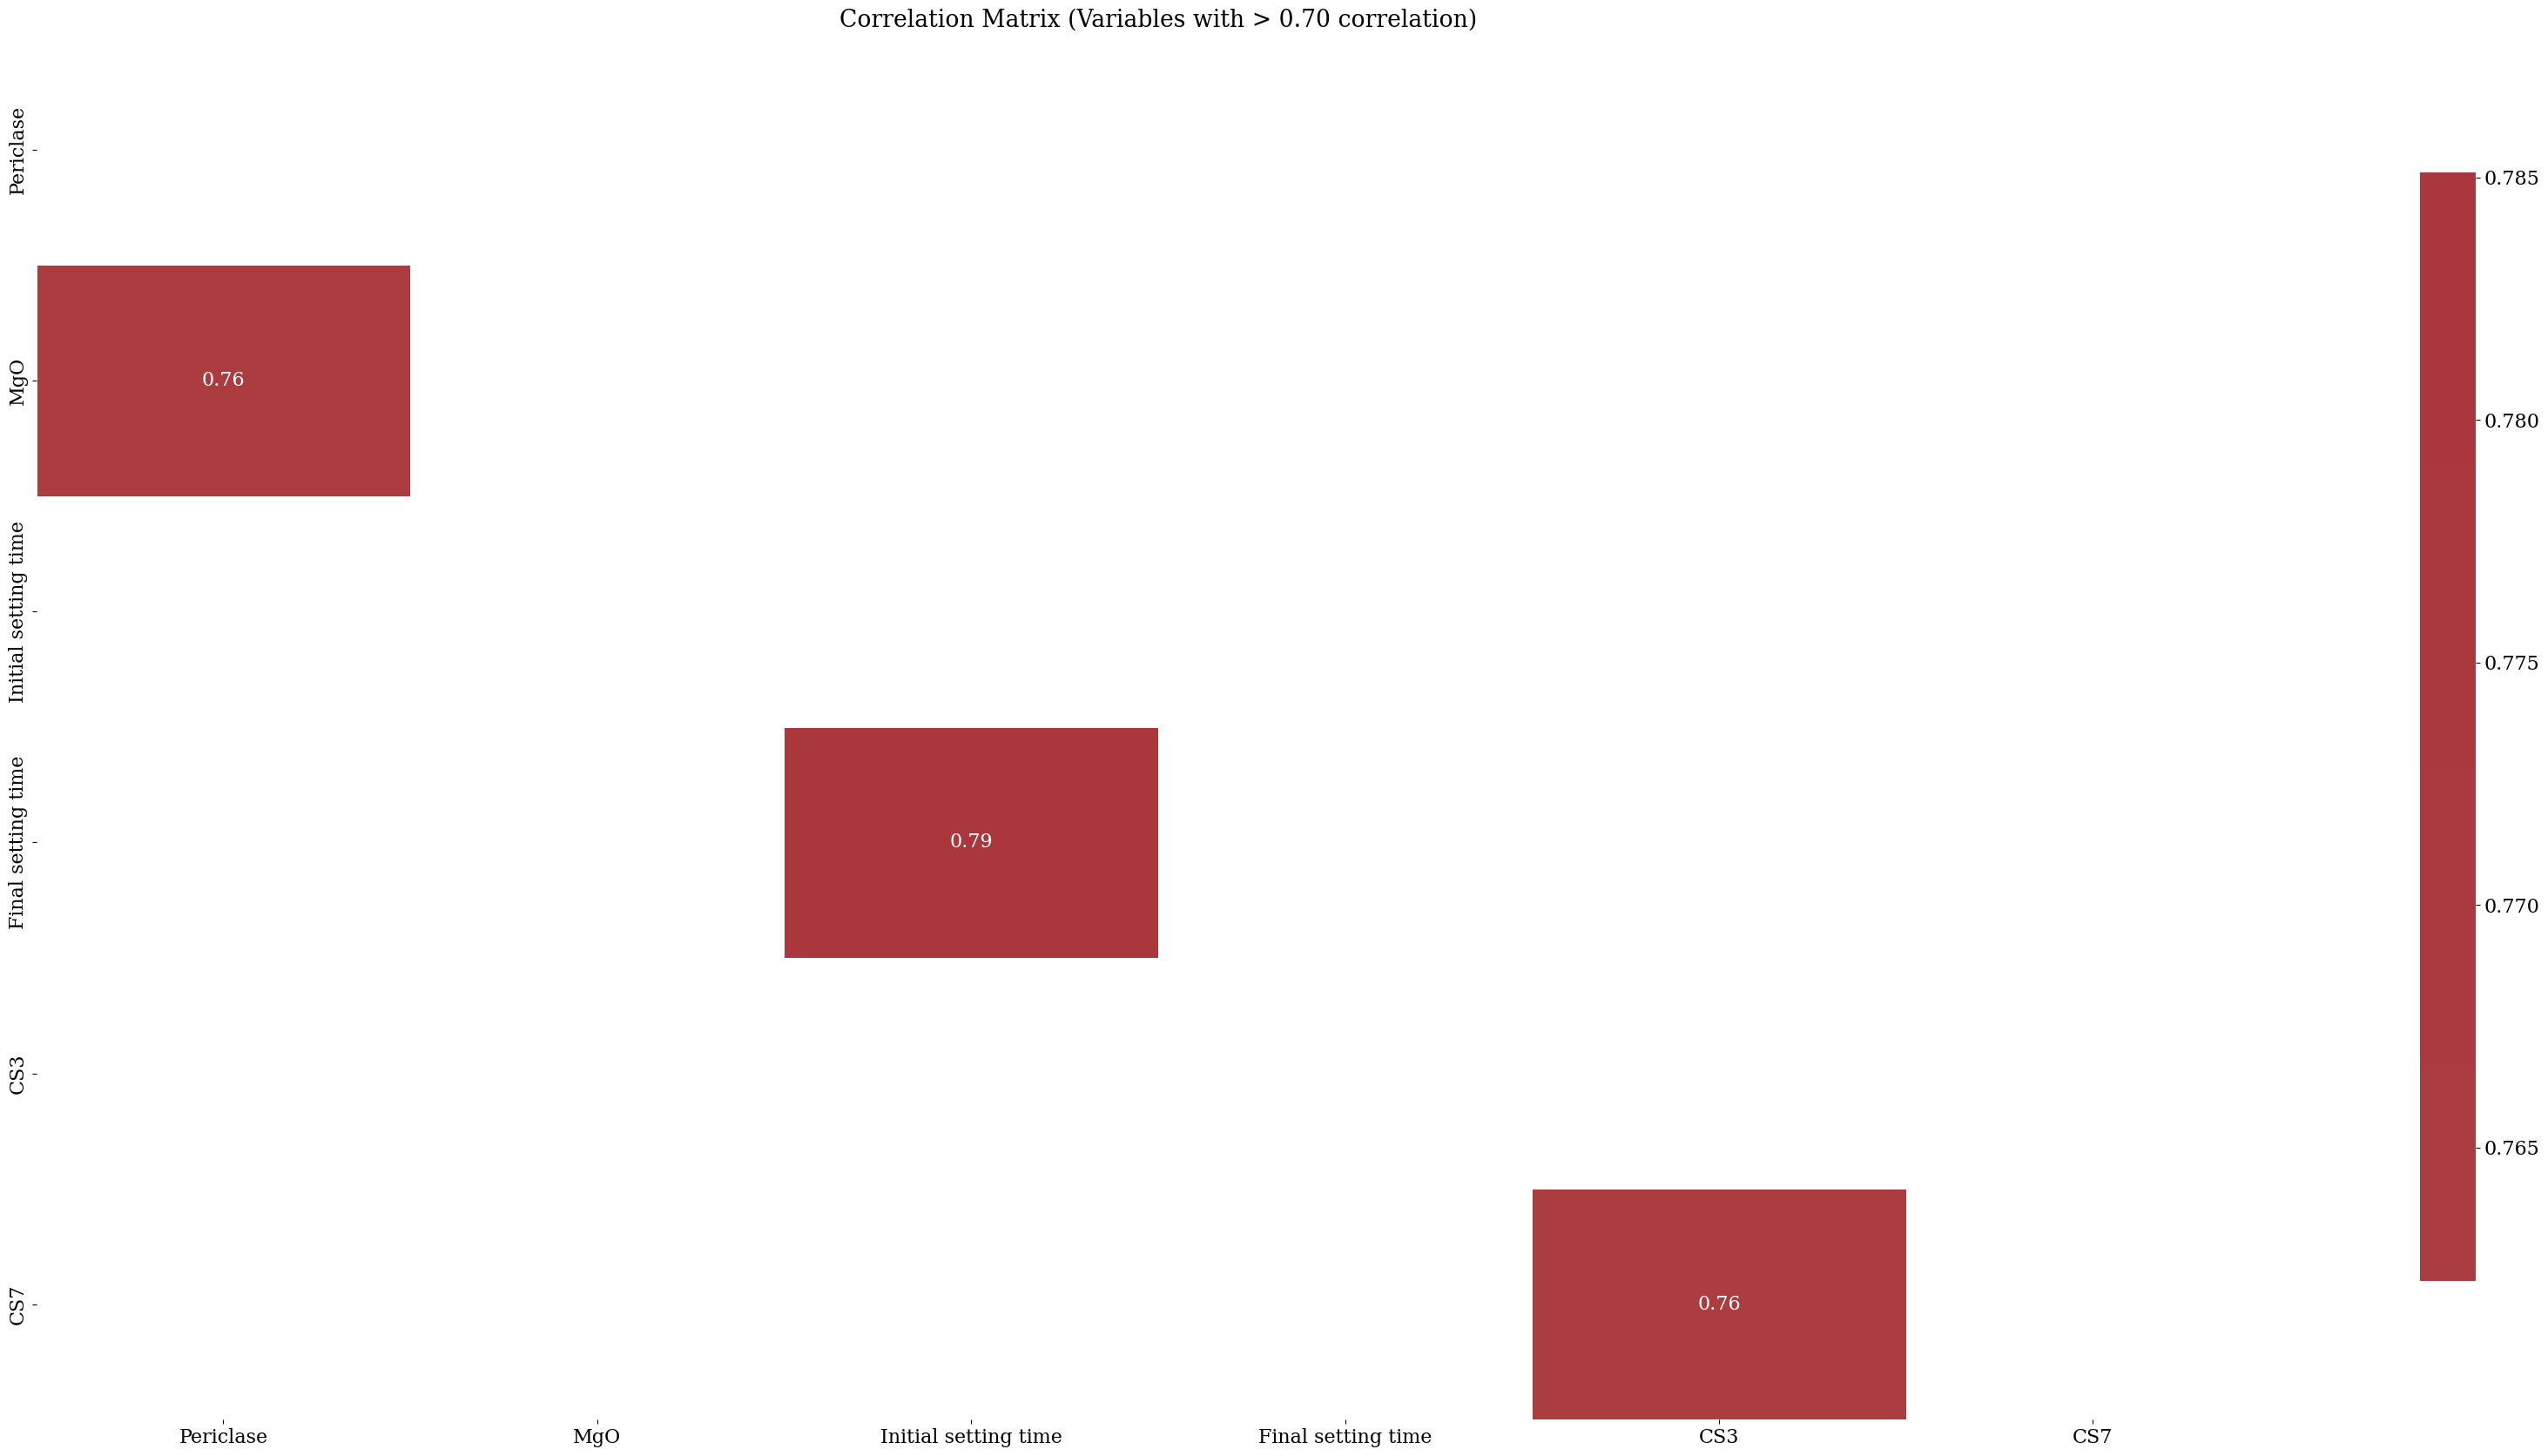

<IPython.core.display.Javascript object>

In [68]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [69]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Initial setting time  Final setting time    0.785095
Periclase             MgO                   0.763891
CS3                   CS7                   0.762246
dtype: float64

<IPython.core.display.Javascript object>

In [70]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS3                            CS28    0.681301
CS7                            CS28    0.676532
Total C3S                      CS28    0.617528
Loss on Ignition               CS28    0.559861
#200                           CS28    0.557234
Calcite                        CS28    0.527289
C4AF                           CS28    0.478331
Quartz                         CS28    0.456034
#325                           CS28    0.423739
Dolimita                       CS28    0.415406
SiO2                           CS28    0.363287
Initial setting time           CS28    0.362884
Fe2O3                          CS28    0.359573
Insoluble Residue              CS28    0.332986
Al2O3                          CS28    0.328212
SO3                            CS28    0.325088
Final setting time             CS28    0.272348
Arcanite                       CS28    0.264512
Alpha C2S                      CS28    0.250105
Blaine                         CS28    0.216817
Total C2S                      CS28    0

<IPython.core.display.Javascript object>

#### Bivariate Analysis

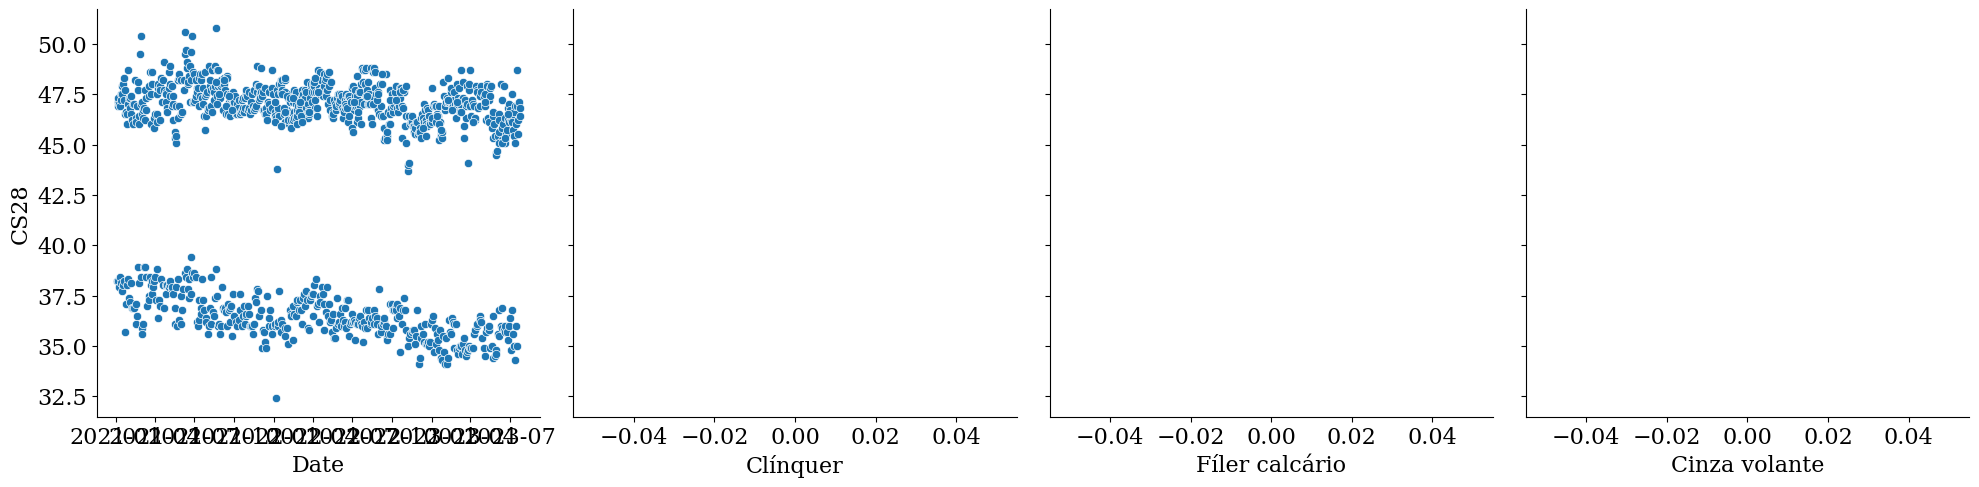

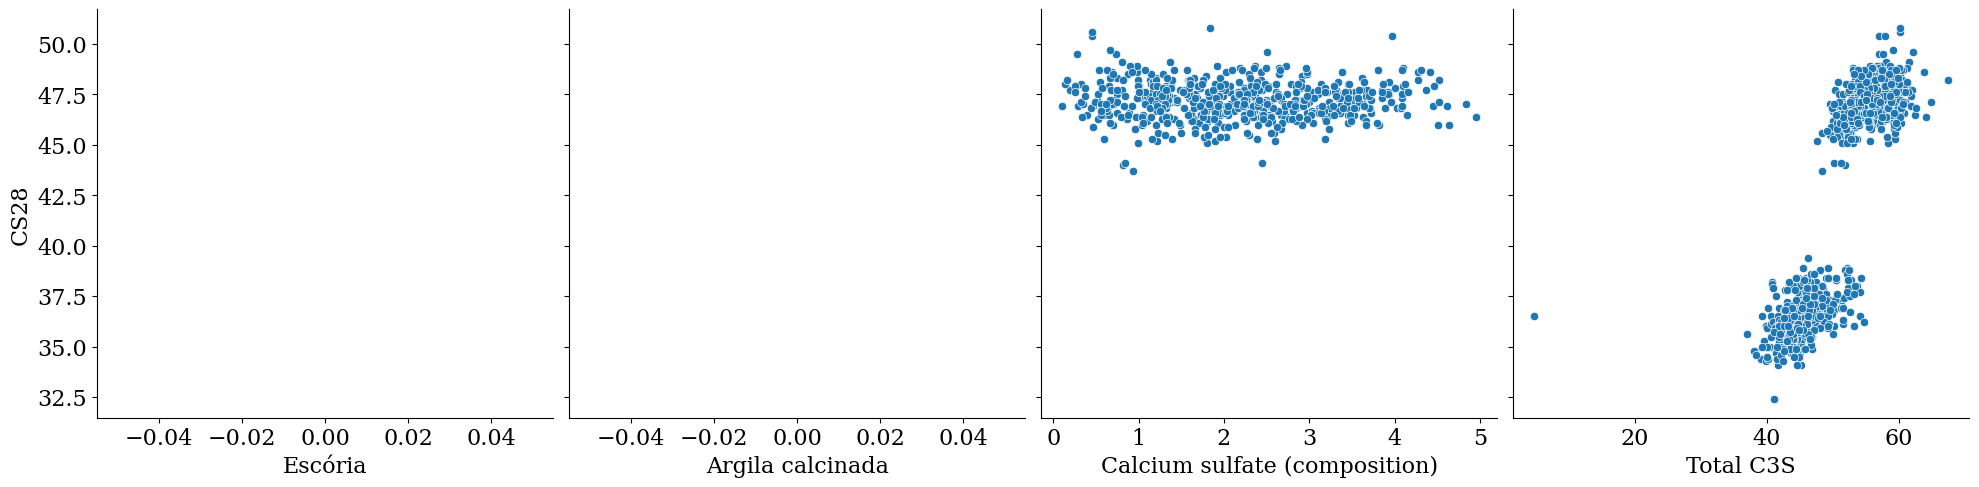

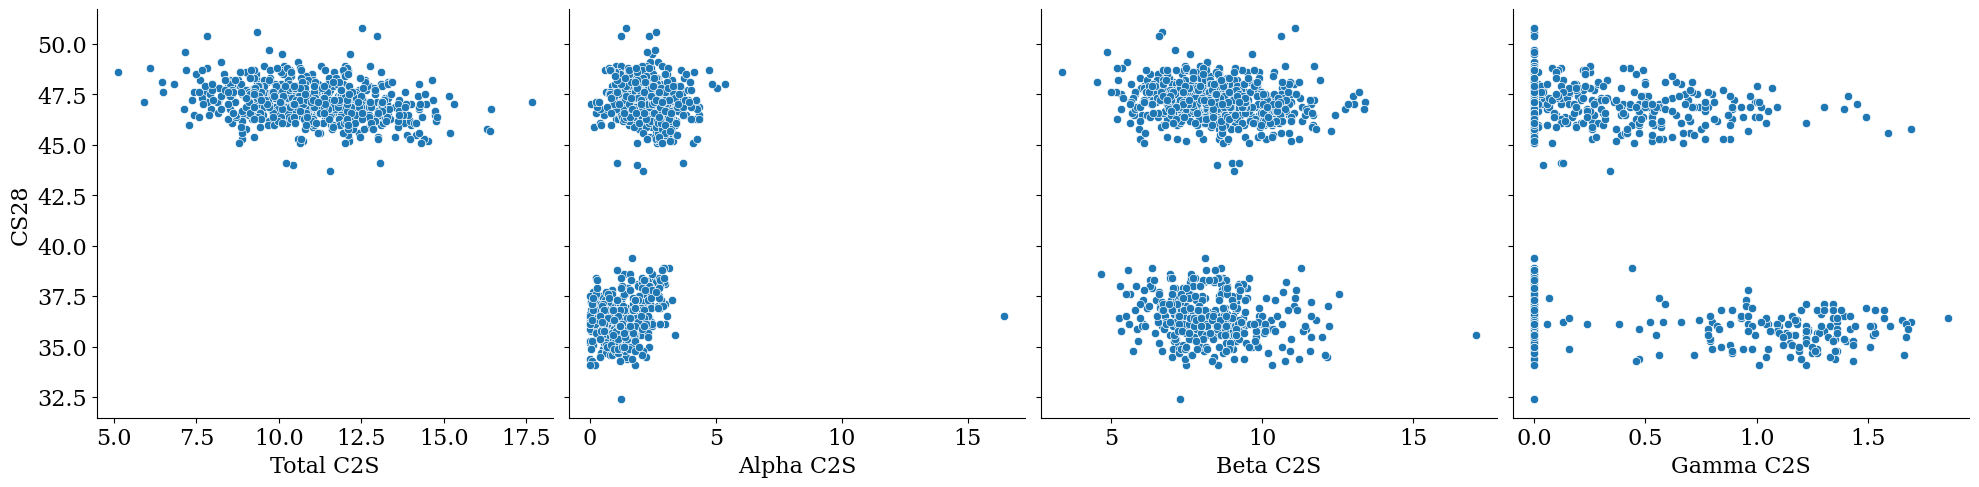

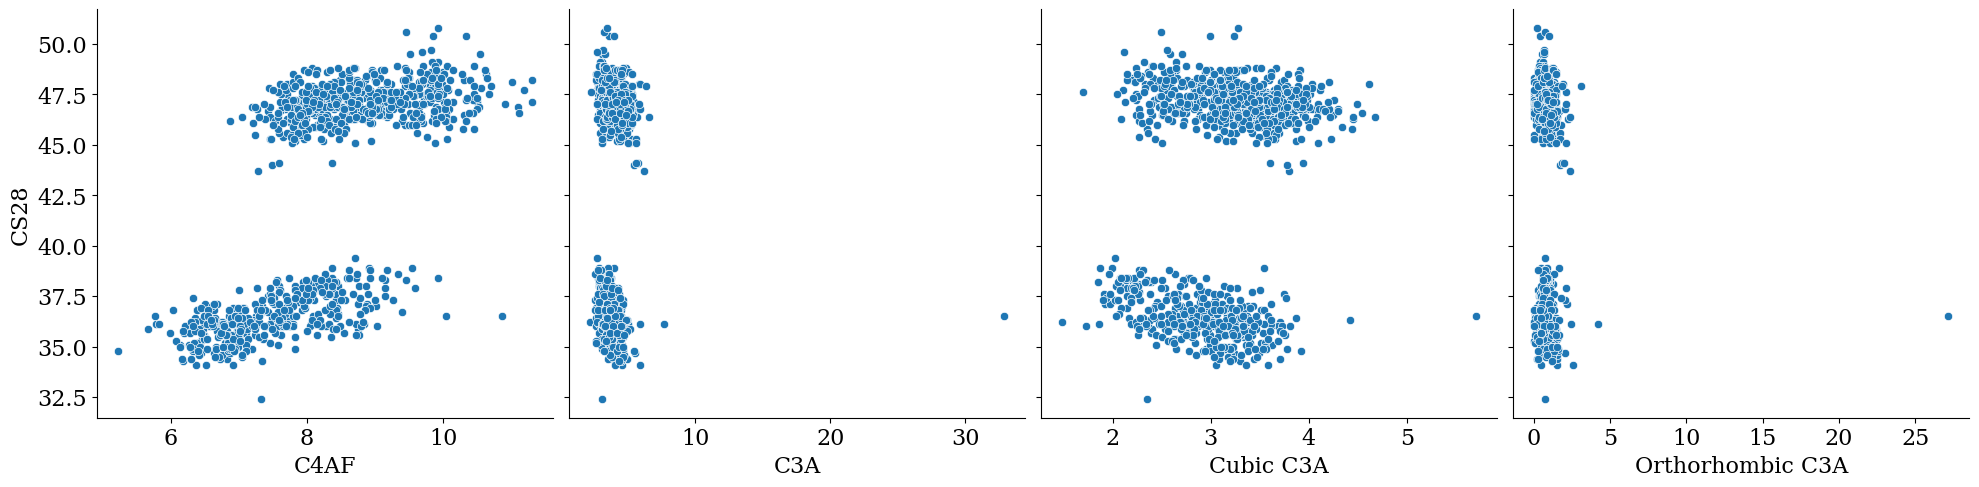

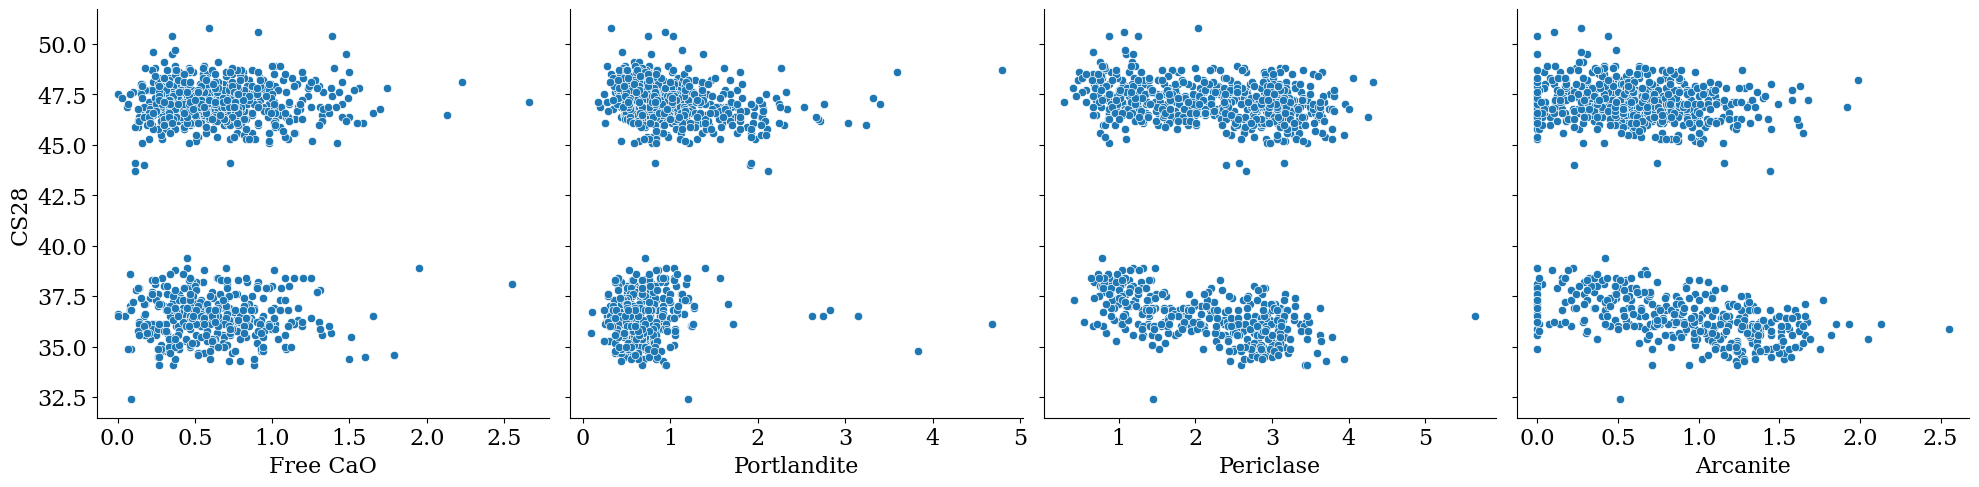

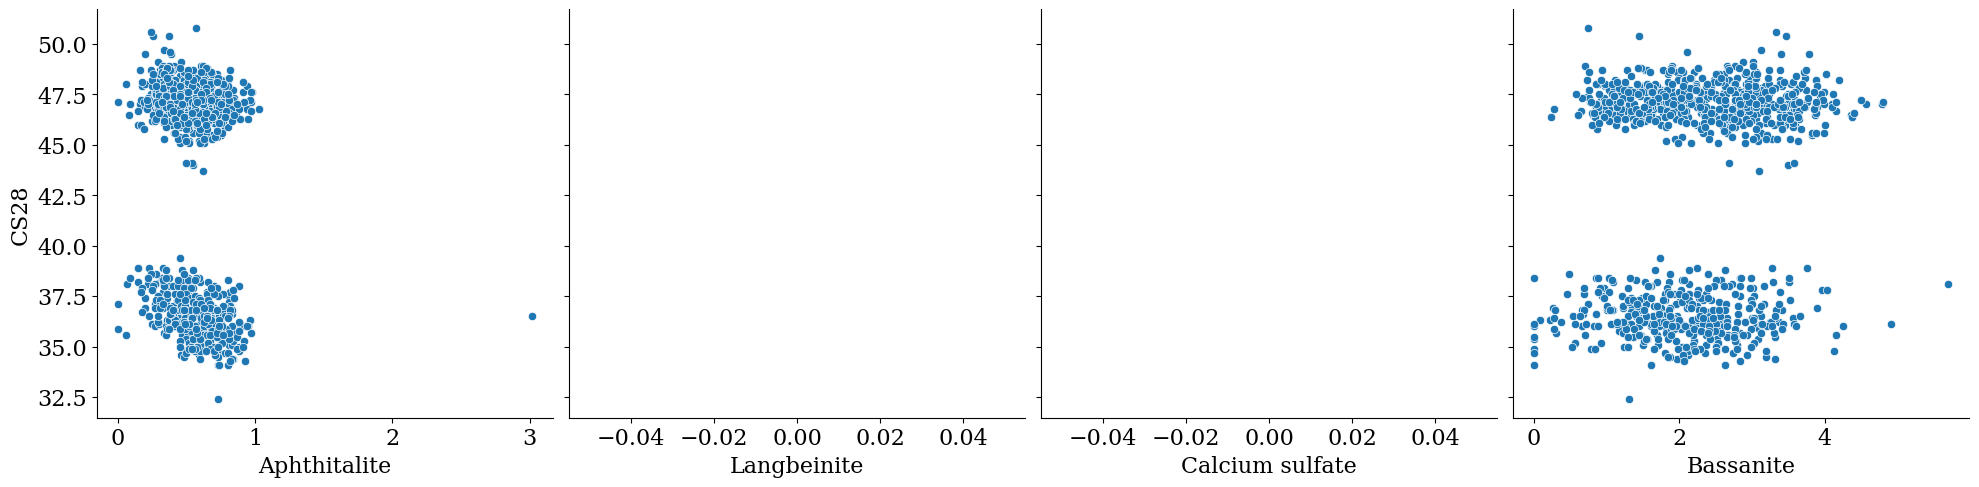

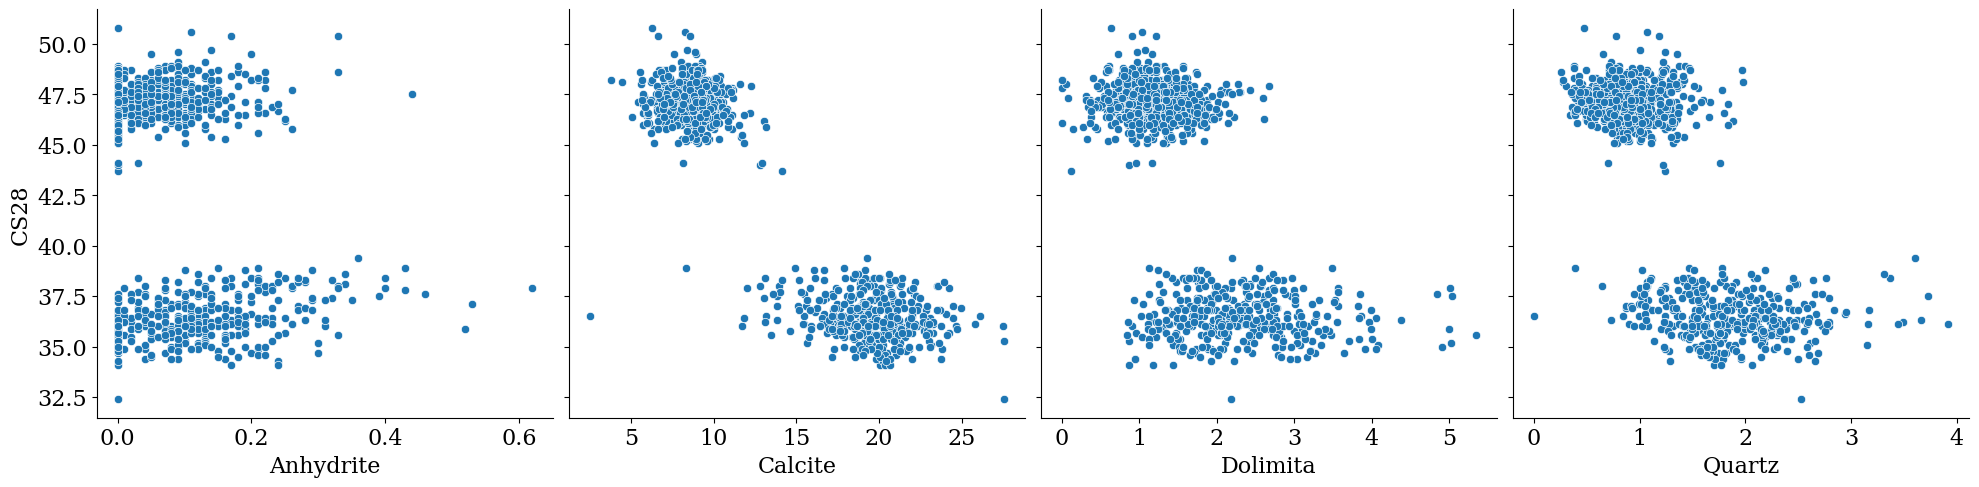

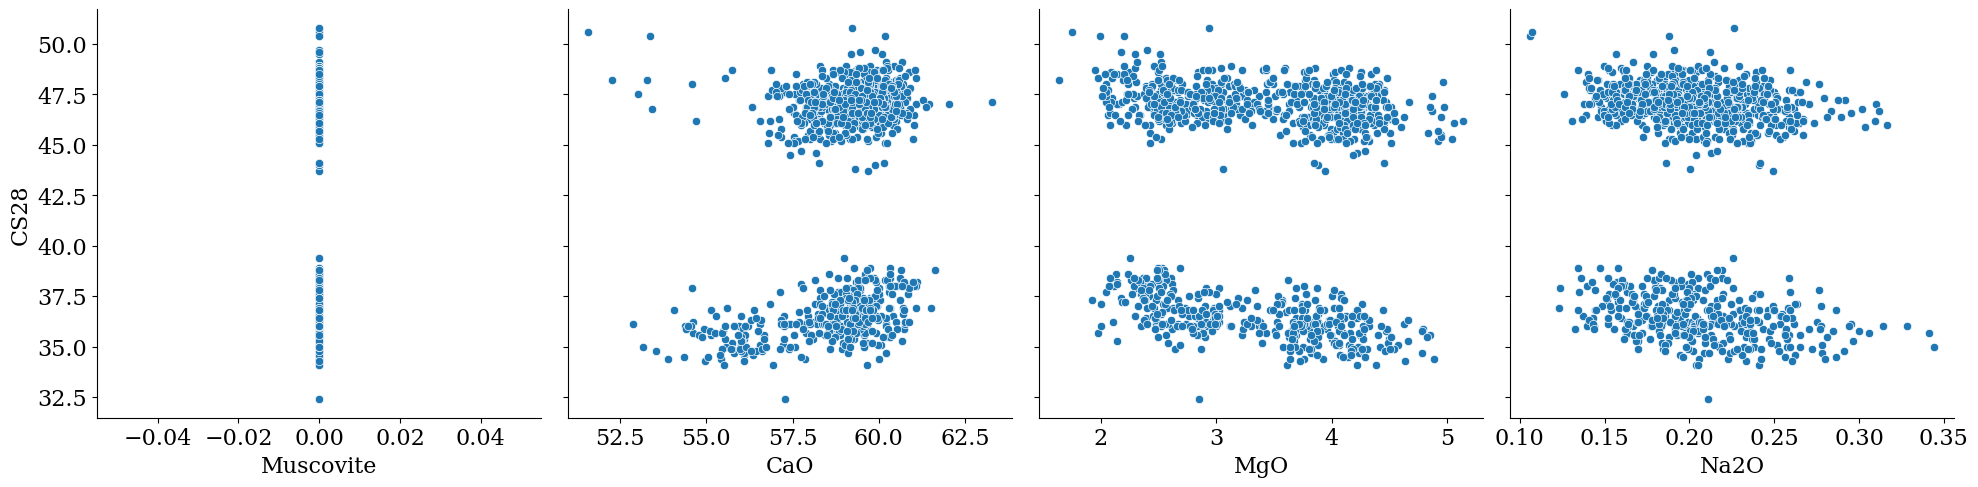

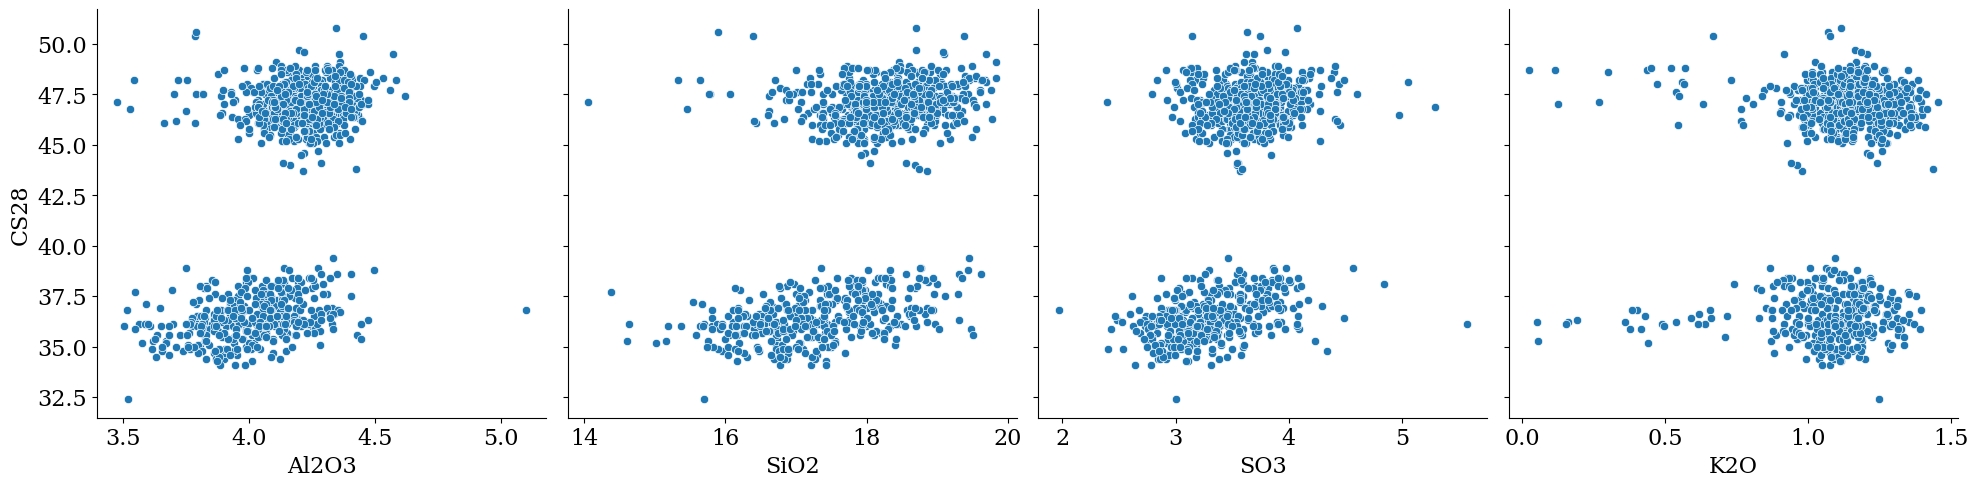

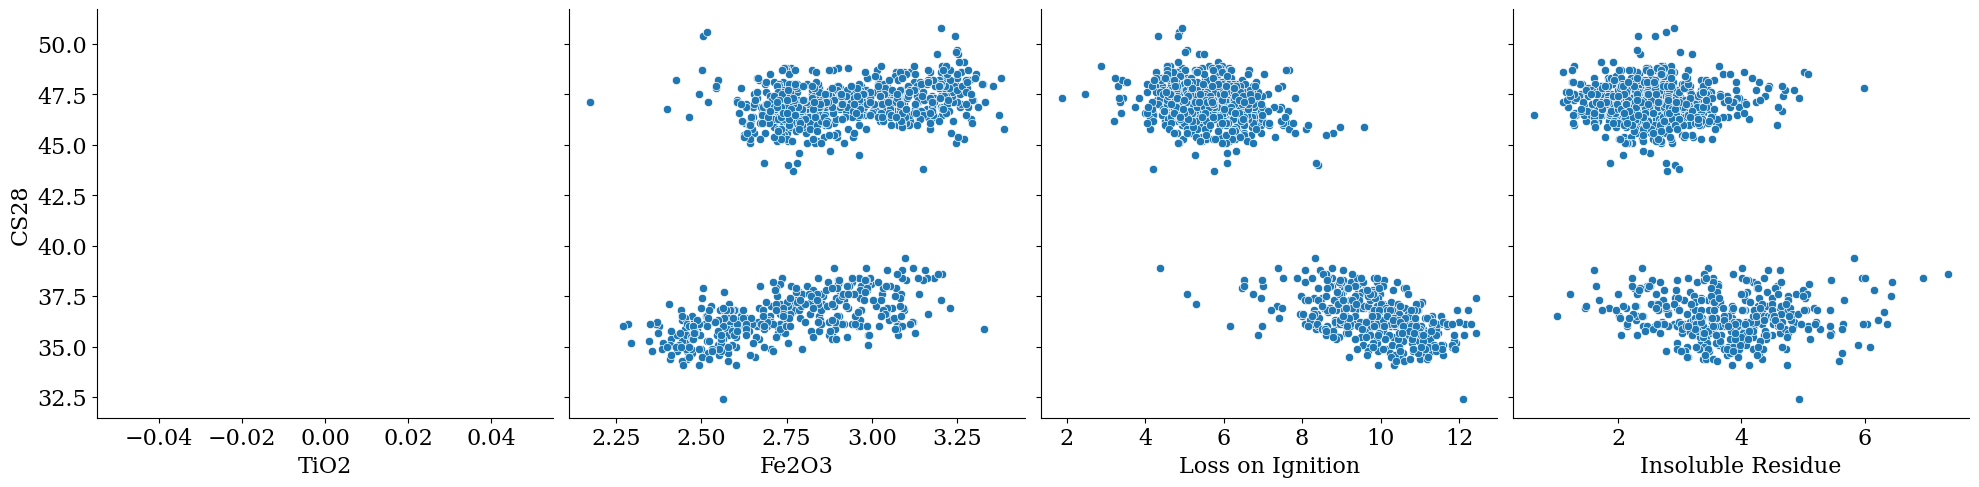

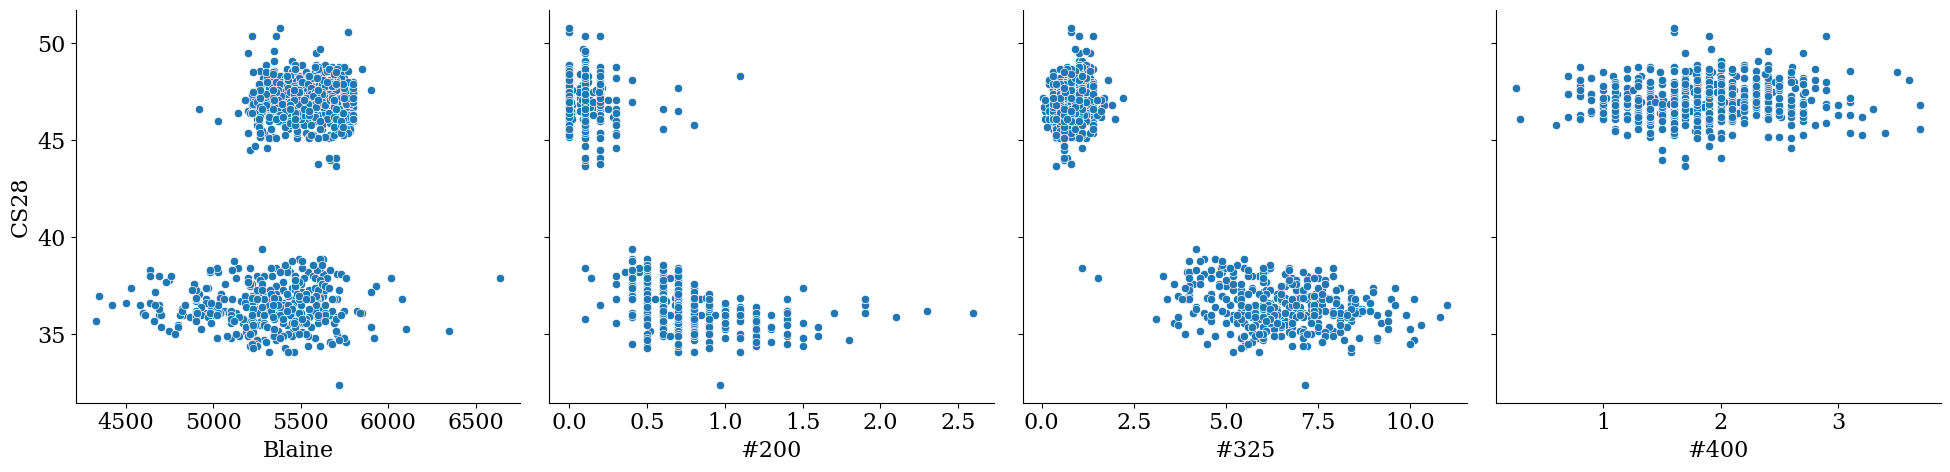

<IPython.core.display.Javascript object>

In [71]:
num_lines = 11
plots_per_line = 4

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [72]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

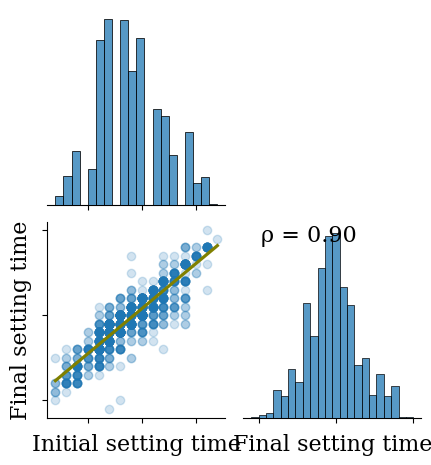

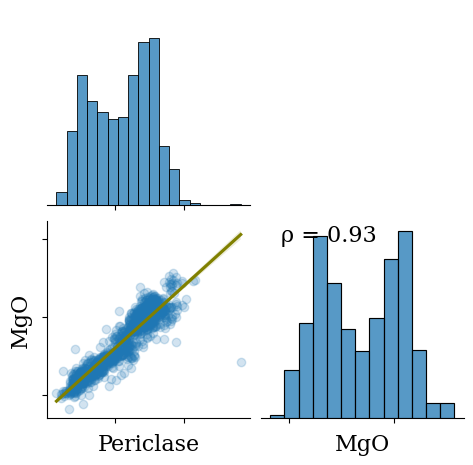

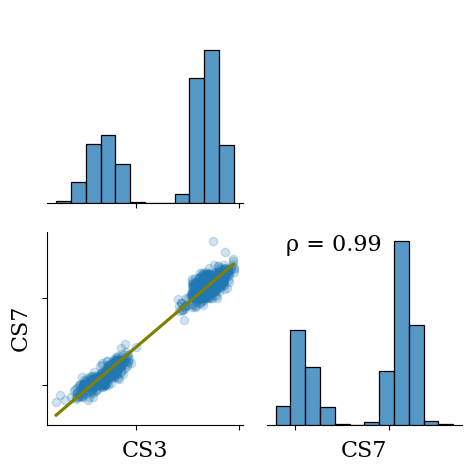

<IPython.core.display.Javascript object>

In [73]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [74]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

600 valid days out of 705


<IPython.core.display.Javascript object>

In [75]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [76]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6, 7, 8}}

<IPython.core.display.Javascript object>

In [77]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        24
      2        21
      3        22
      4        22
      5        22
      6        25
      7        23
      8        26
      9        23
      10       23
      11       21
      12       24
2022  1        20
      2        21
      3        24
      4        24
      5        26
      6        23
      7        23
      8        24
      9        23
      10       24
      11       18
      12       22
2023  1        23
      2        20
      3        22
      4        17
      5        20
      6        20
      7        22
      8        13
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

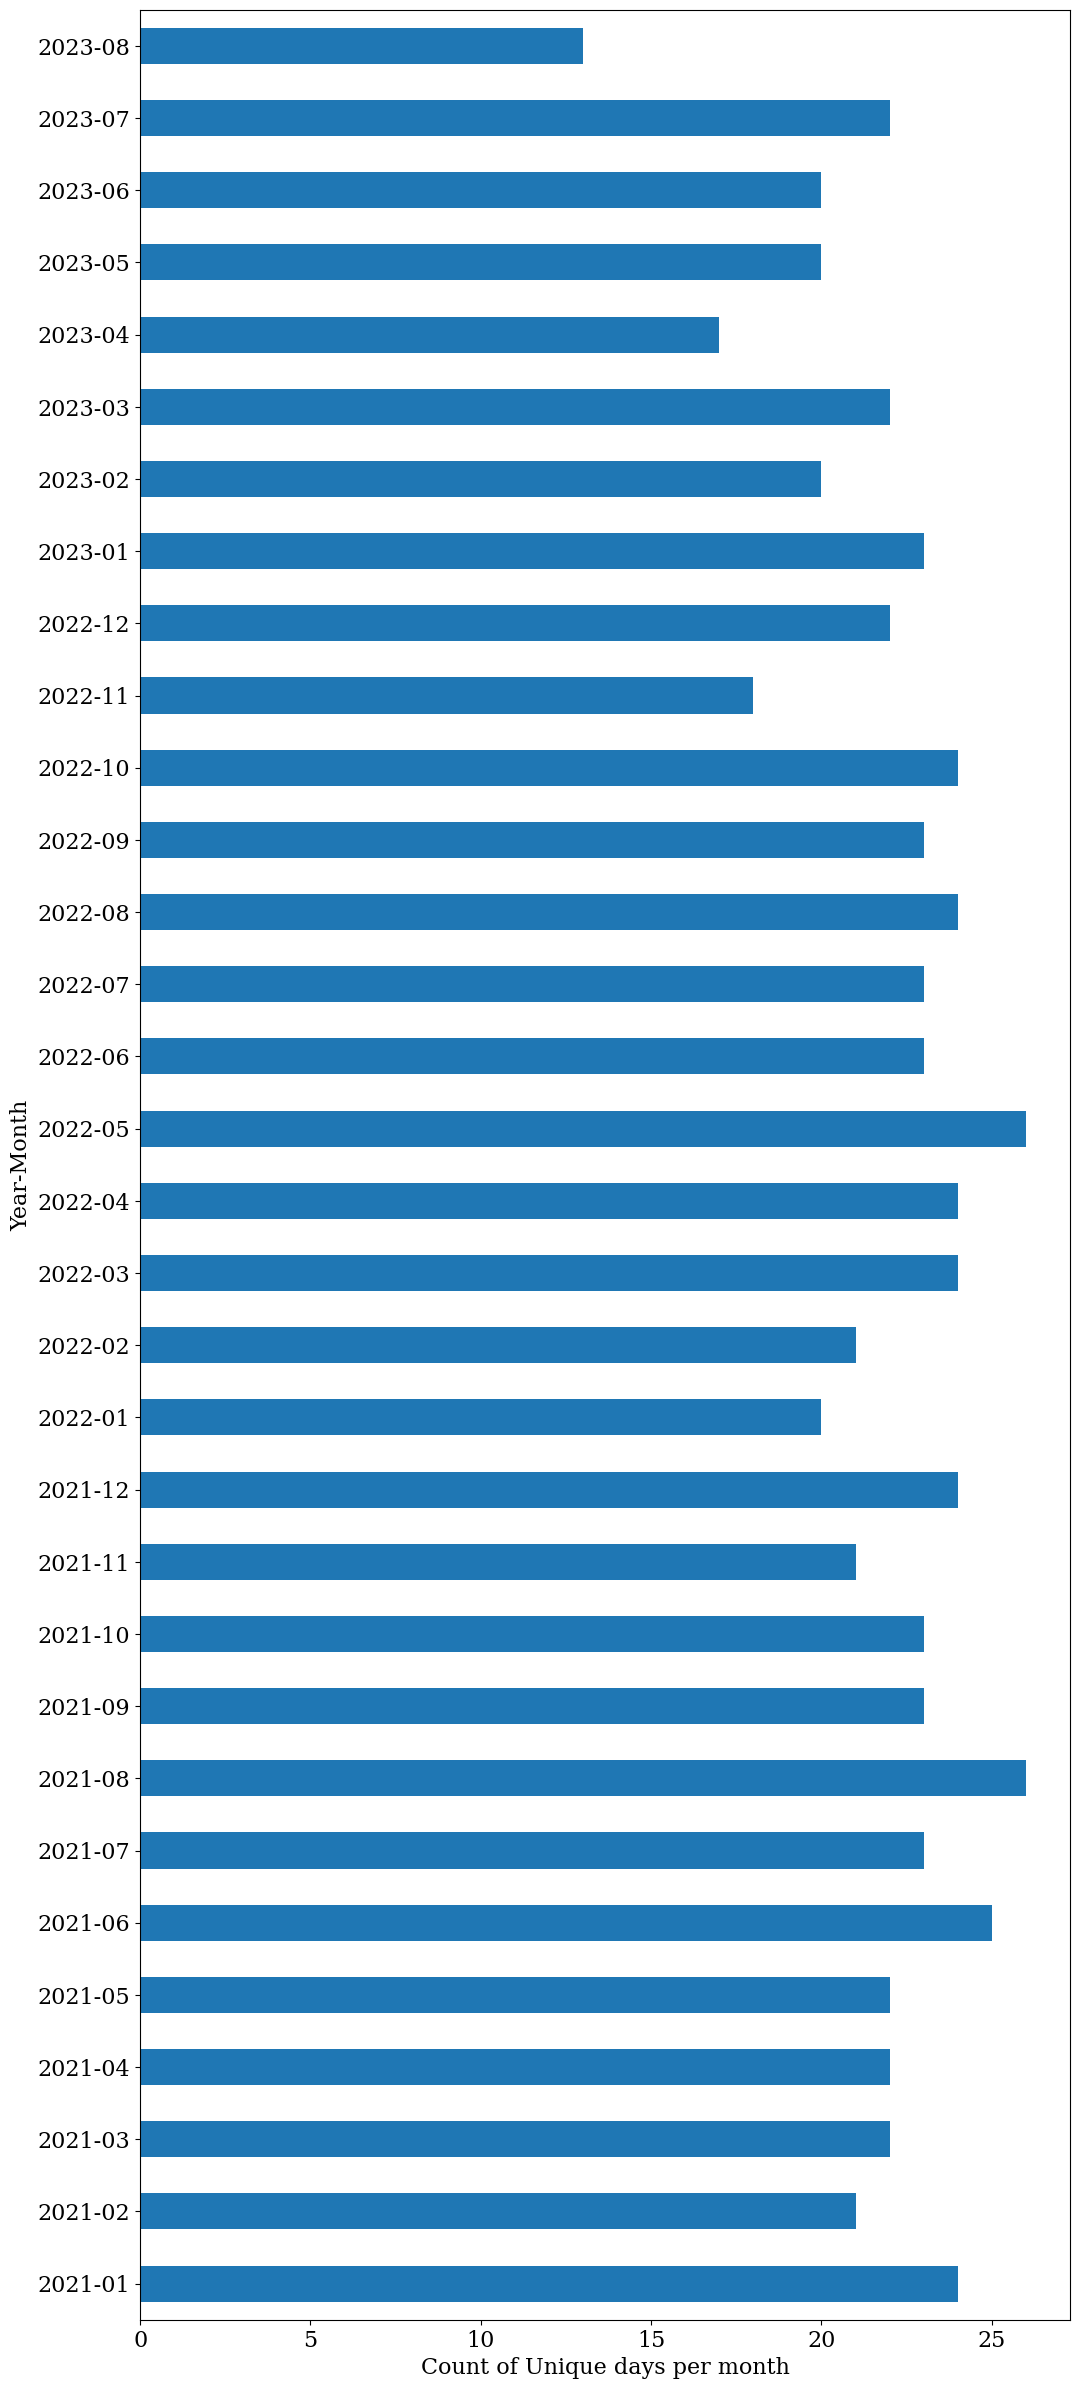

<IPython.core.display.Javascript object>

In [78]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [79]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        31
      2        31
      3        34
      4        31
      5        34
      6        34
      7        36
      8        39
      9        37
      10       32
      11       32
      12       33
2022  1        40
      2        42
      3        40
      4        36
      5        35
      6        42
      7        40
      8        42
      9        34
      10       37
      11       31
      12       36
2023  1        40
      2        34
      3        37
      4        27
      5        34
      6        36
      7        37
      8        18
Name: size, dtype: int64


<IPython.core.display.Javascript object>

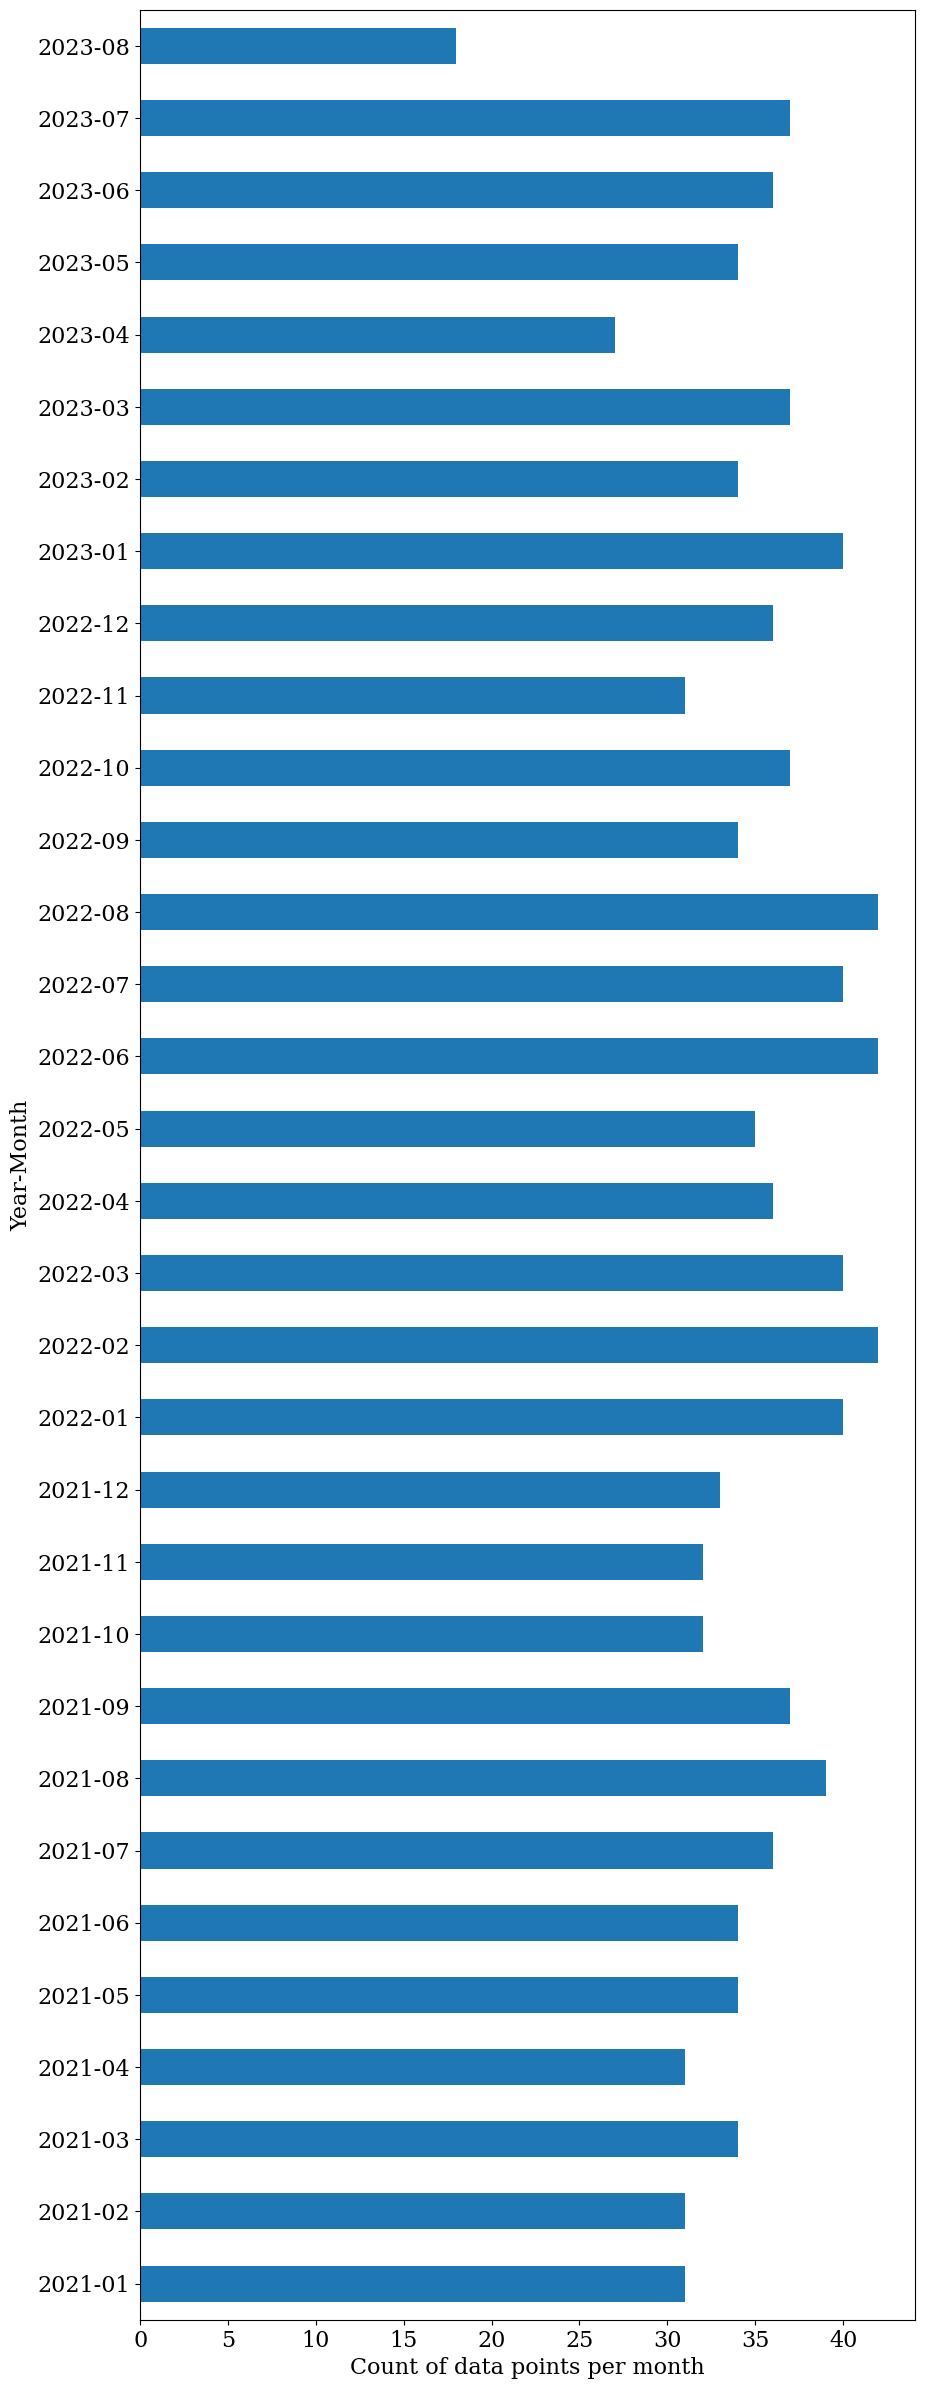

<IPython.core.display.Javascript object>

In [80]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [81]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2023-8 has the minimum number of days with samples - 18
2022-2 has the maximum number of days with samples - 42


<IPython.core.display.Javascript object>

In [82]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2021: 33, 2022: 37, 2023: 32}

Mean number of observations - all years
35


<IPython.core.display.Javascript object>

In [83]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  705.000000
mean     1.591489
std      0.593943
min      1.000000
25%      1.000000
50%      2.000000
75%      2.000000
max      3.000000

<IPython.core.display.Javascript object>

In [84]:
day_counts[["DayCount"]].value_counts()

DayCount
2           339
1           327
3            39
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [85]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
177  2021      8   23         3
189  2021      9    8         3
193  2021      9   13         3
199  2021      9   20         3
205  2021      9   27         3
276  2022      1    3         3
278  2022      1    5         3
286  2022      1   17         3
290  2022      1   21         3
292  2022      1   26         3
297  2022      2    2         3
300  2022      2    7         3
301  2022      2    9         3
305  2022      2   14         3
306  2022      2   15         3
308  2022      2   17         3
310  2022      2   21         3
312  2022      2   23         3
316  2022      2   28         3
317  2022      3    2         3
318  2022      3    4         3
320  2022      3    7         3
331  2022      3   21         3
333  2022      3   23         3
403  2022      6   18         3
404  2022      6   20         3
406  2022      6   22         3
415  2022      7    4         3
417  2022      7    6         3
458  2022      8   29         3
538  2022     12   19         3
548  2023      1    2         3
555  2023      1   11         3
557  2023      1   13         3
560  2023      1   18         3
563  2023      1   23         3
608  2023      3   24         3
658  2023      6   14         3
683  2023      7   19         3

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

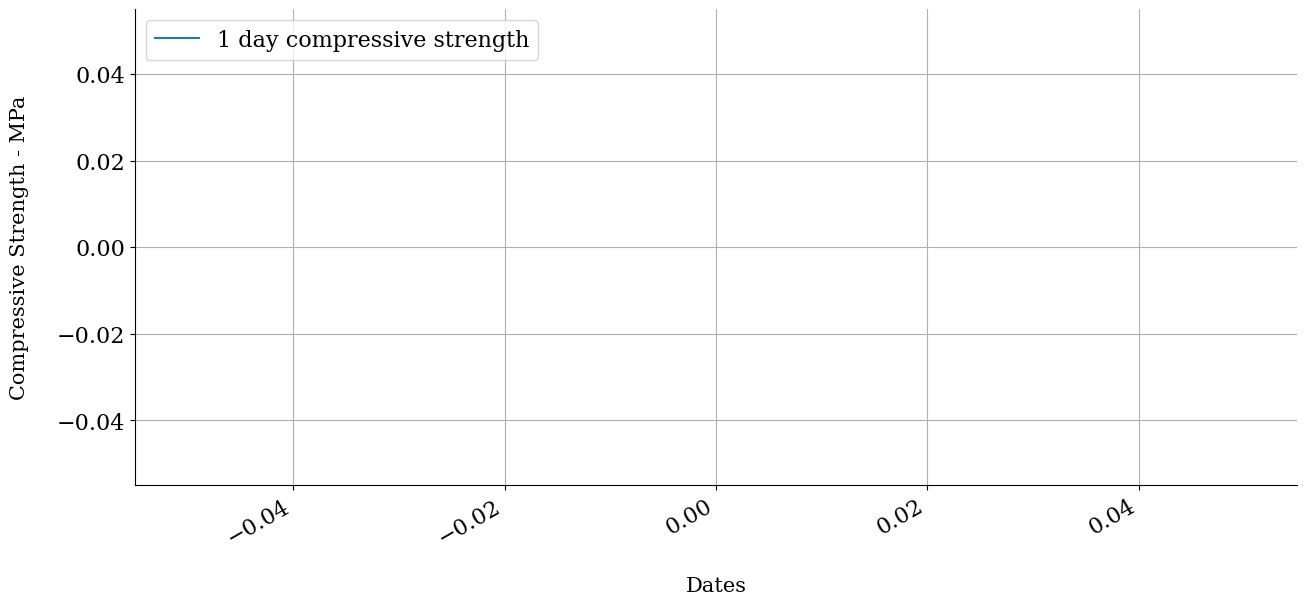

<IPython.core.display.Javascript object>

In [86]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

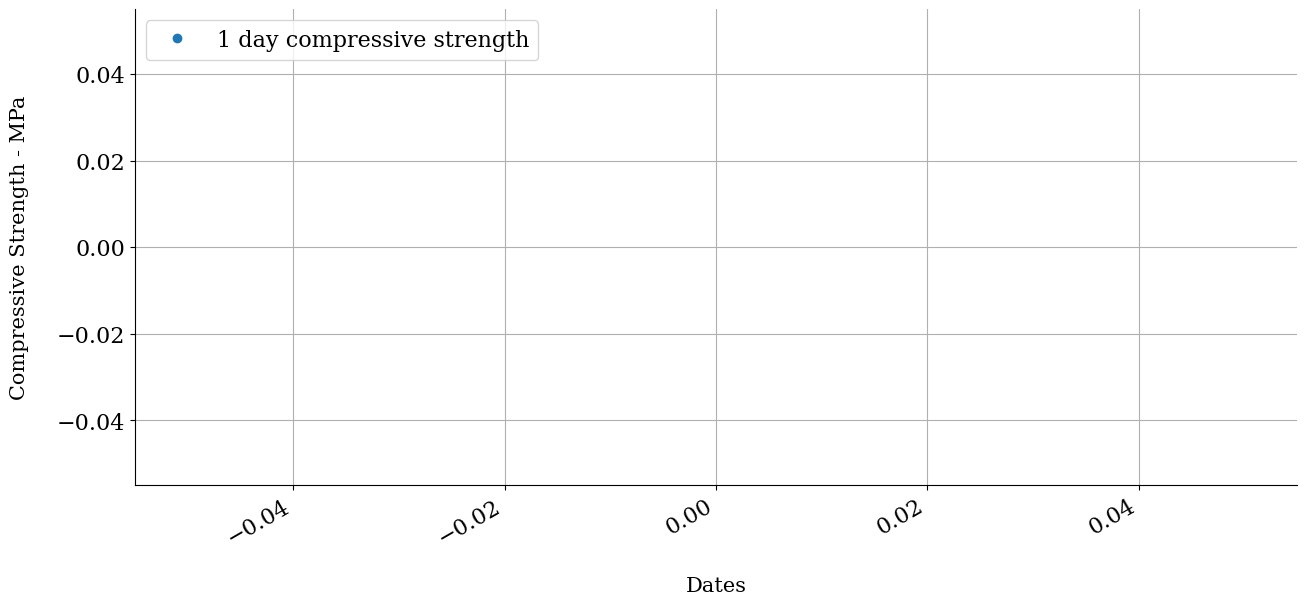

<IPython.core.display.Javascript object>

In [87]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

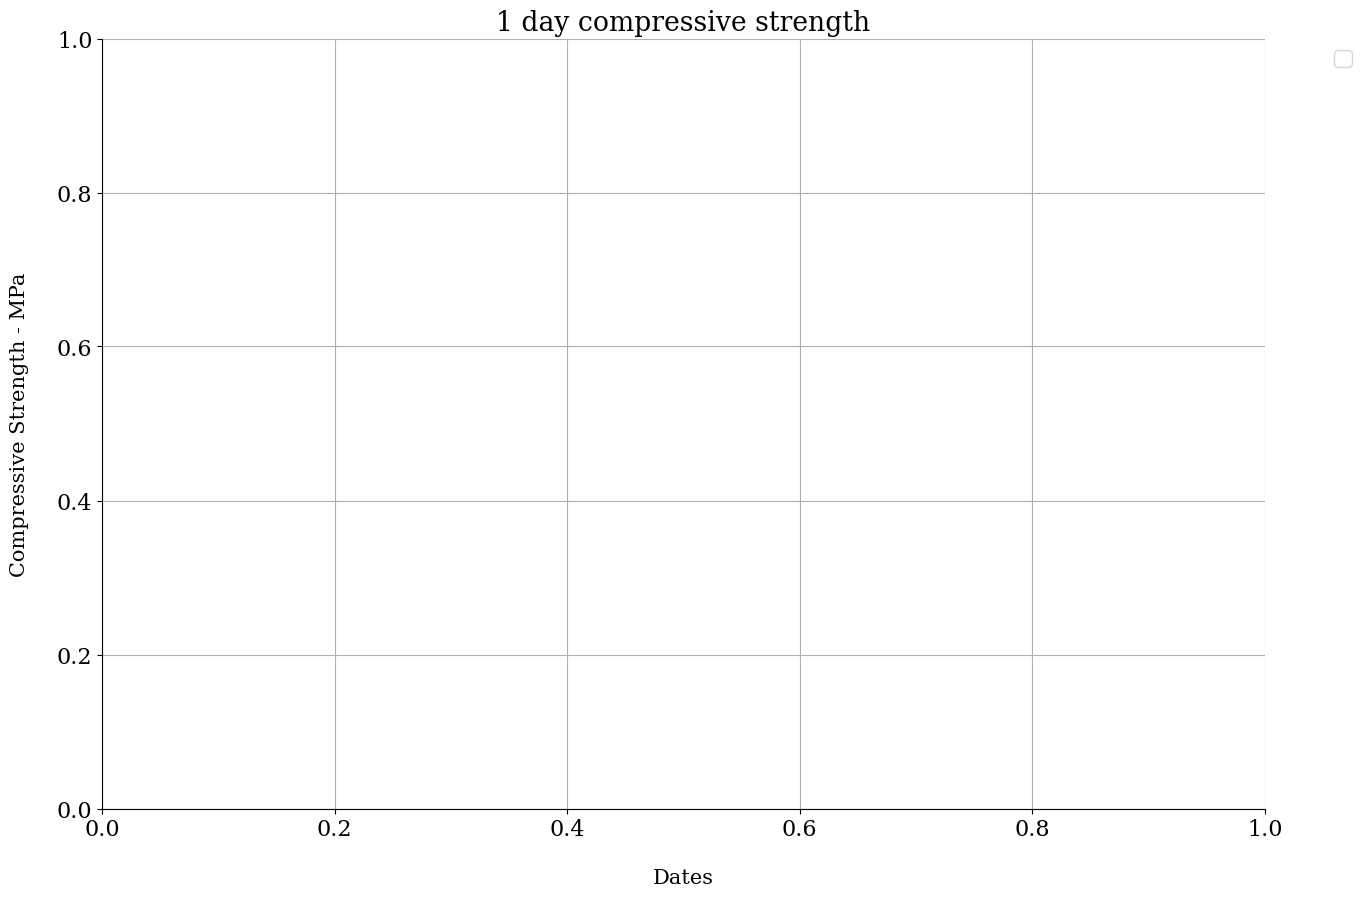

<IPython.core.display.Javascript object>

In [88]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

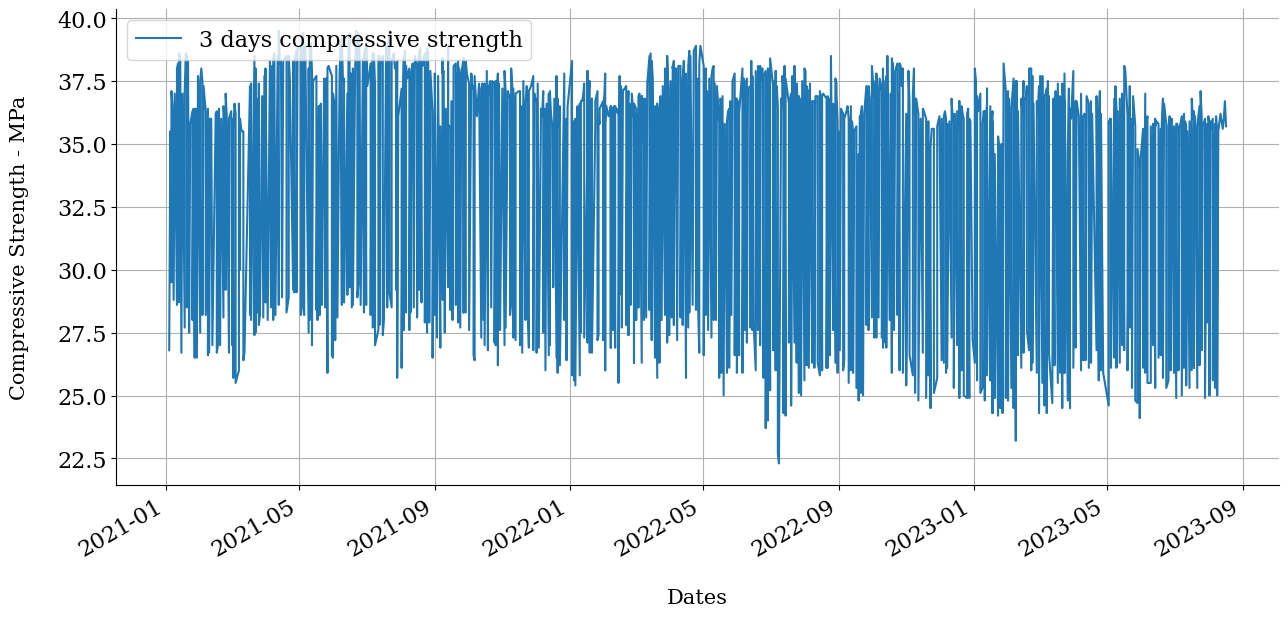

<IPython.core.display.Javascript object>

In [89]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

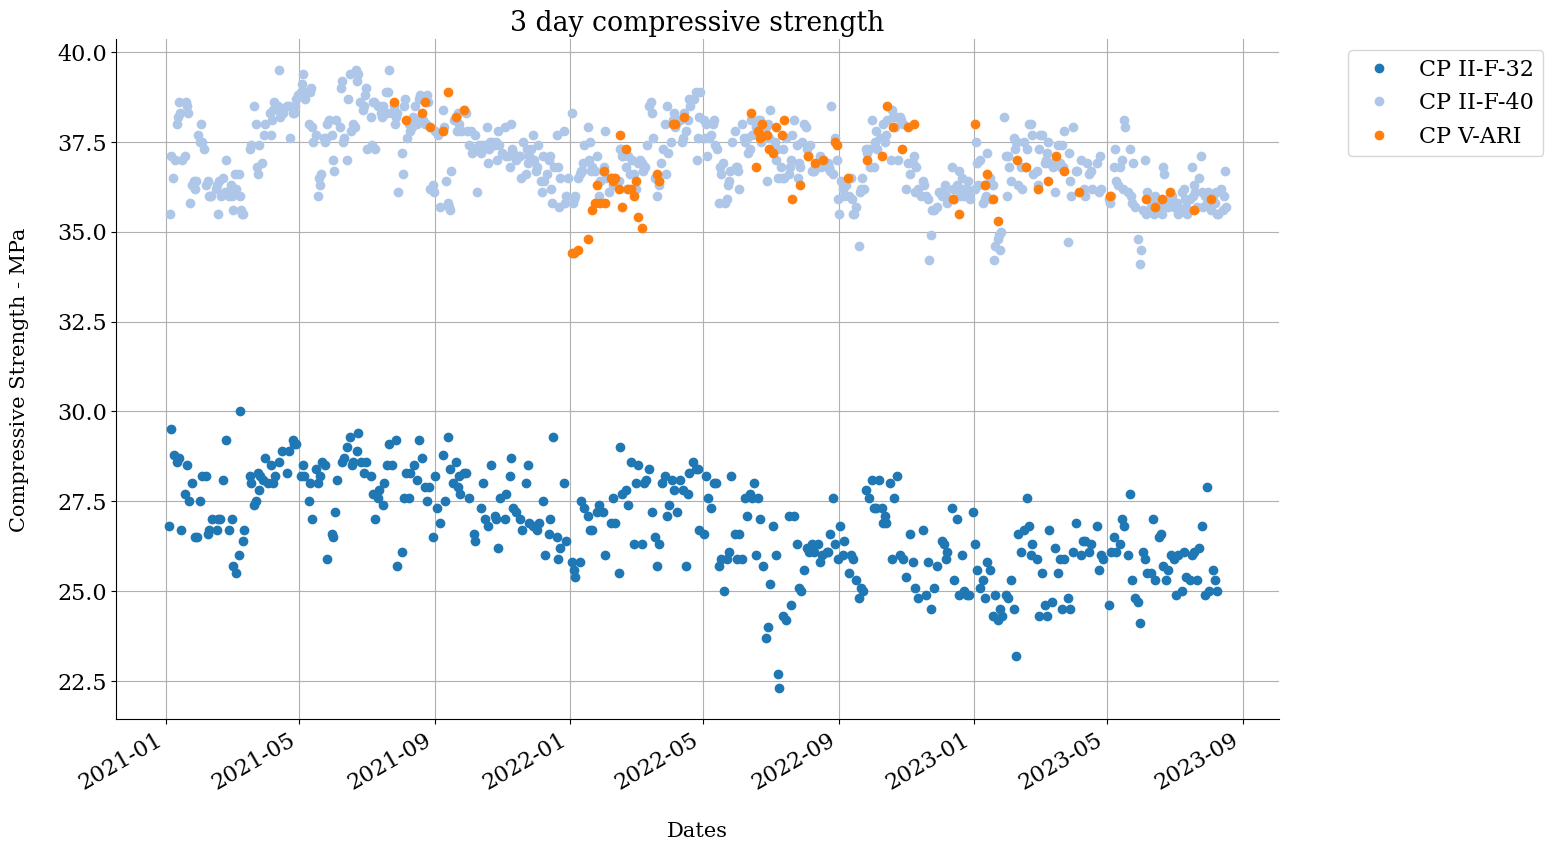

<IPython.core.display.Javascript object>

In [90]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

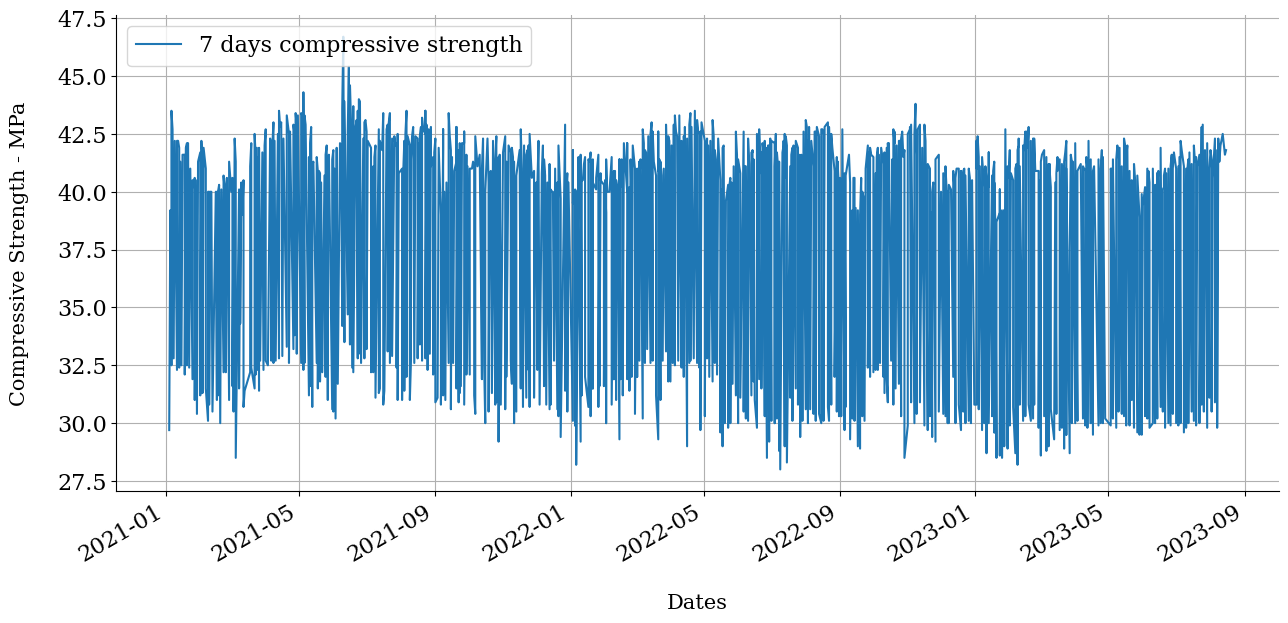

<IPython.core.display.Javascript object>

In [91]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

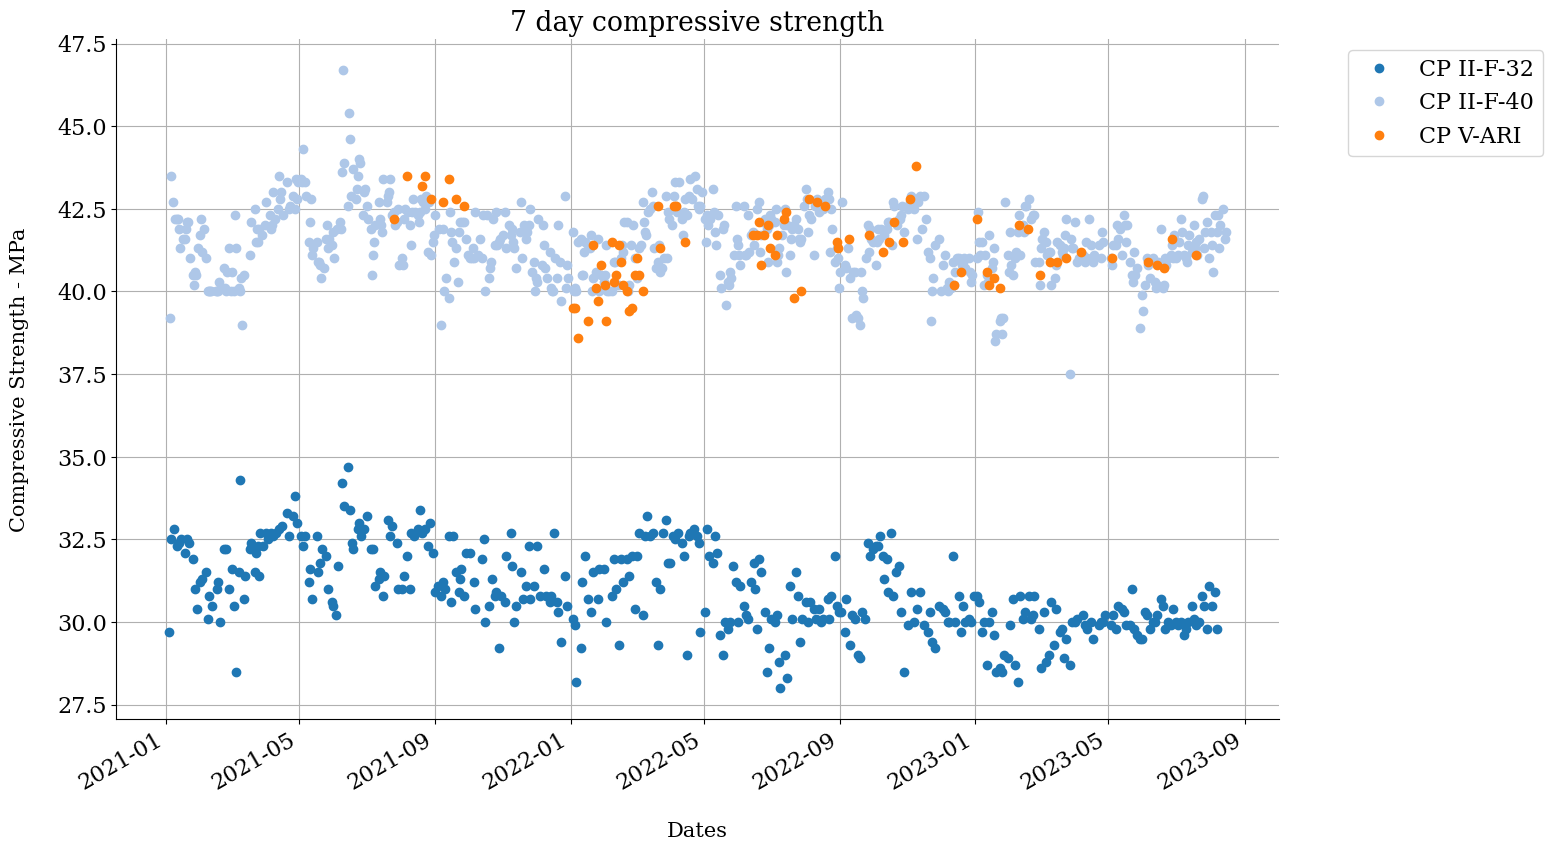

<IPython.core.display.Javascript object>

In [92]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

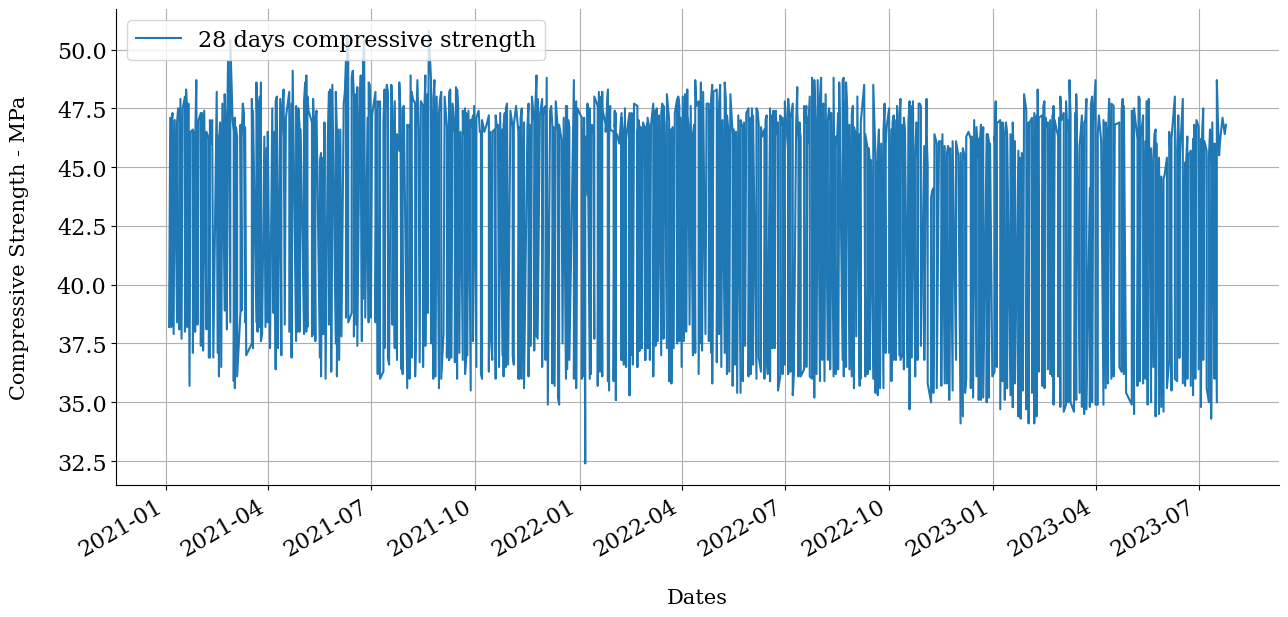

<IPython.core.display.Javascript object>

In [93]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

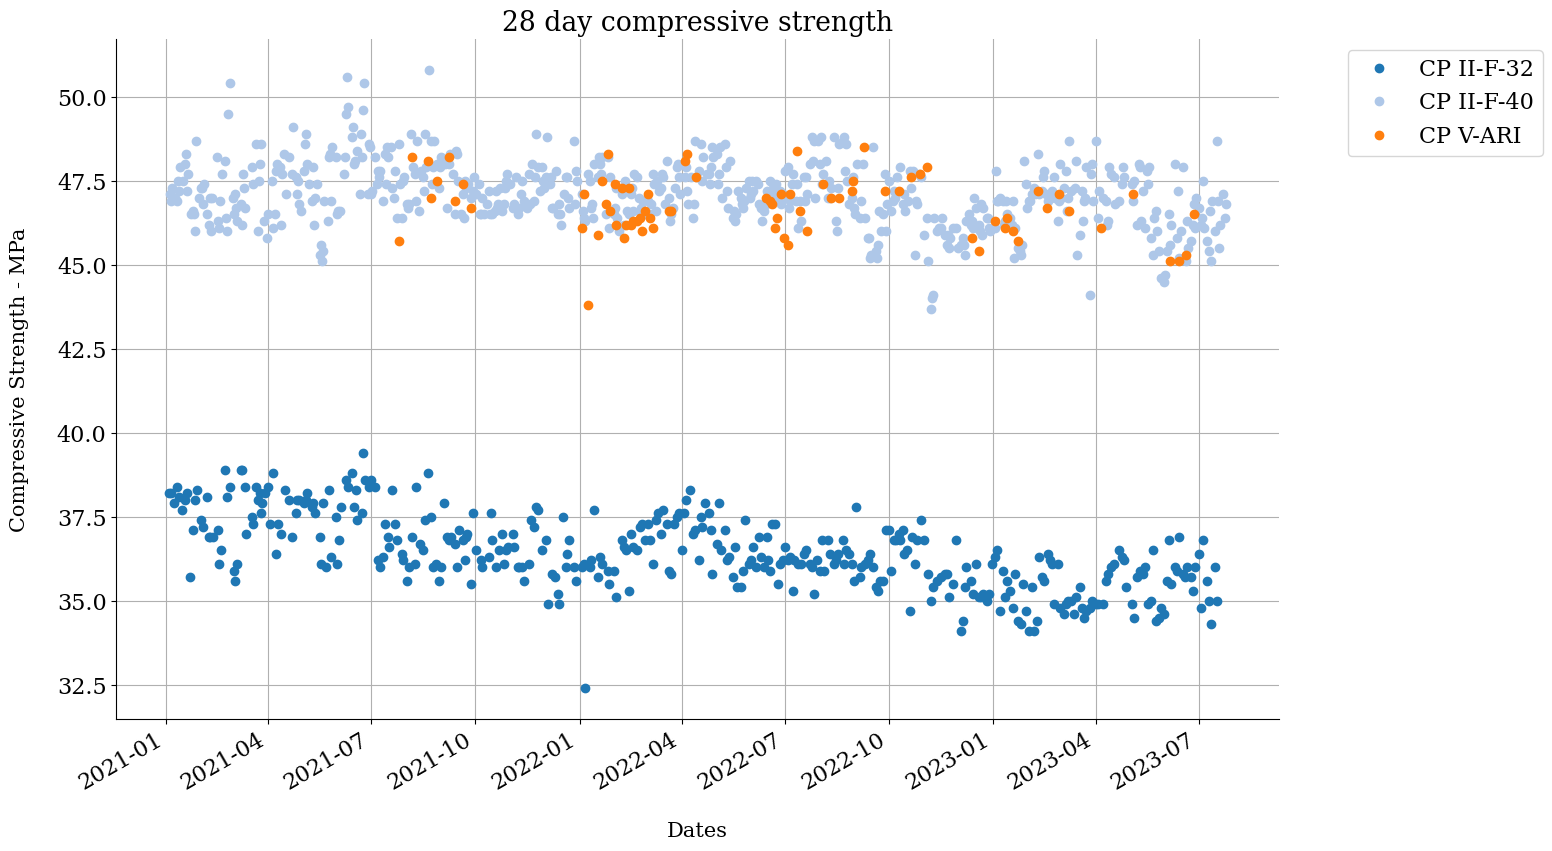

<IPython.core.display.Javascript object>

In [94]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()